<img src="https://github.com/DanialSoleimany/heart-disease-prediction/raw/main/heartdisease.png" alt="Heart Disease" width="1200">

In [1]:
import re
import requests
from IPython.display import HTML

# Download styles from github:
github_url = "https://raw.githubusercontent.com/DanialSoleimany/heart-disease-prediction/main/heart-styles.py"

response = requests.get(github_url)
if response.status_code == 200:
    exec(response.text)
else:
    print("Failed to fetch file from GitHub")

Stored 'styles' (str)


In [2]:
HTML(styles)

<div class="hover-effect" id="setup">
        <p class="text"><b>👨🏻‍⚕️ Heart Disease Prediction 🩺</b></p>
        <div class="overlay"></div>
</div>



<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff; line-height: 1.8em;">
    <h2 style="color:#4169e1; font-size:20px; text-align: justify;">🎯 Objectives</h2>
    <p style="font-size:16px; font-family:Calibri, sans-serif; font-size:20px; font-family:calibri; text-indent: 20px; text-align: justify;">
        <ul style="font-size:18px; font-family:calibri;">
            <li><b style="color: #0f52ba;">Machine Learning Models:</b> Our main aim in this project is to predict whether a person has heart disease or not, using classification models.</li>
            <li><b style="color: #0f52ba;">Heart Disease Features Explanation:</b> I'll provide detailed explanations of the features related to heart disease to enhance understanding.</li>
            <li><b style="color: #0f52ba;">Exploratory Data Analysis:</b> Utilizing various plots like donut charts, histograms, and bar charts, I'll illustrate the distribution of each variable in the univariate analysis section, and the relationship between features and target variables in the bivariate analysis section.</li>
            <li><b style="color: #0f52ba;">Outlier Detection:</b> After exploring the dataset, it's important to identify and handle anomalies. I'll focus on detecting and handling outliers.</li>
            <li><b style="color: #0f52ba;">Box-Cox Transformation:</b> Due to the small dataset size, dealing with outliers becomes challenging. Dropping them isn't feasible, so I'll explore Box-Cox transformation as an alternative.</li>
            <li><b style="color: #0f52ba;">Imbalanced Target:</b> Addressing imbalanced target variables is crucial for achieving accurate predictions across both classes. I'll employ innovative methods to tackle this issue.</li>
            <li><b style="color: #0f52ba;">Feature Engineering & Correlation Analysis:</b> Certain features require encoding, such as using one-hot encoding for categorical features. I'll assess the correlation between these features and the target variable, dropping those with the weakest correlation.</li>
            <li><b style="color: #0f52ba;">Comparing Model Accuracies:</b> Finally, I'll compare the accuracies achieved by different models to determine which one performs best.</li>
        </ul>
    </p>
</div>

<a id="contents_table"></a>   

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#6495ed;"><b>👨🏻‍⚕ Table of Contents 🩺</b></h1>
    <ul style="font-size:20px; font-family:calibri; line-height: 1.5em;">
        <li><a href="#libraries" style="text-decoration: none;font-size:16px;">Step 1 | Import Libraries</a></li>
        <li><a href="#read" style="text-decoration: none;font-size:16px;">Step 2 | Read Dataset</a>
        </li>
        <li><a href="#overview" style="text-decoration: none;font-size:16px;">Step 3 | Dataset Overview & Preparation</a>
            <ul>
                <li><a href="#description" style="text-decoration: none;font-size:14px;">Step 3.1 | Description Of Variables</a></li>
                <li><a href="#rename" style="text-decoration: none;font-size:14px;">Step 3.2 | Rename Variables</a></li>
                <li><a href="#review" style="text-decoration: none;font-size:14px;">Step 3.3 | Quick Review Of Dataset</a></li>
                <li><a href="#info" style="text-decoration: none;font-size:14px;">Step 3.4 | Basic Information</a></li>
                <li><a href="#summary" style="text-decoration: none;font-size:14px;">Step 3.5 | Statistical Summary</a></li>
            </ul>
        </li>
        <li><a href="#eda" style="text-decoration: none;font-size:16px;">Step 4 | Exploratary Data Analysis (EDA)</a>
            <ul>
                <li><a href="#univariate" style="text-decoration: none;font-size:14px;">Step 4.1 | Univariate Analysis</a></li>
                <ul>
                    <li><a href="#numerical_univariate" style="text-decoration: none;font-size:13px;">Step 4.1.1 | Numerical Variables</a></li>
                    <li><a href="#categorical_univariate" style="text-decoration: none;font-size:13px;">Step 4.1.2 | Binary & Categorical Variables</a></li>
                </ul>
                <li><a href="#bivariate" style="text-decoration: none;font-size:16px;">Step 4.2 | Bivariate Analysis</a></li>
                <ul>
                    <li><a href="#numerical_bivariate" style="text-decoration: none;font-size:13px;">Step 4.2.1 | Numerical Variables</a></li>
                    <li><a href="#categorical_bivariate" style="text-decoration: none;font-size:13px;">Step 4.2.2 | Binary & Categorical Variables</a></li>
                </ul>
            </ul>
        </li>
        <li><a href="#preprocessing" style="text-decoration: none;font-size:16px;">Step 5 | Preprocessing</a></li>
        <ul>
            <li>
                <a href="#outliers" style="text-decoration: none;font-size:14px;">Step 5.1 | Handling Outliers</a>
                <ul>
                    <li><a href="#boxcox" style="text-decoration: none;font-size:14px;">5.1.1 | Box-Cox Transformation</a></li>
                    <li><a href="#nboxcox" style="text-decoration: none;font-size:14px;">5.1.2 | Numerical Variables After Box-Cox Transformation</a></li>
                </ul>
            </li>
            <li><a href="#missing" style="text-decoration: none;font-size:14px;">Step 5.2 | Missing Values</a></li>
            <li><a href="#duplicated" style="text-decoration: none;font-size:14px;">Step 5.3 | Duplicated Values</a></li>
        </ul>
         <li><a href="#feature_engineering" style="text-decoration: none;font-size:16px;">Step 6 | Feature Engineering</a>
            <ul>
                <li><a href="#onehot_encoding" style="text-decoration: none;font-size:14px;">Step 6.1 | One-Hot Encoding</a></li>
                <li><a href="#label_encoding" style="text-decoration: none;font-size:14px;">Step 6.2 | Label Encoding</a></li>
            </ul>
        </li>
        <li><a href="#corr" style="text-decoration: none;font-size:16px;">Step 7 | Correlation Analysis</a></li>
        <li><a href="#scaling" style="text-decoration: none;font-size:16px;">Step 8 | Feature Scaling</a>
        <li><a href="#modeling" style="text-decoration: none;font-size:16px;">Step 9 | Modeling</a>
            <ul>
                <li>
                    <a href="#knn" style="text-decoration: none;font-size:14px;">Step 9.1 | K-Nearest Neighbors (KNN)</a>
                    <ul>
                        <li><a href="#knn-hpt" style="text-decoration: none;font-size:13px;"> Step 9.1.1 | Build KNN & Hyper-parameter tuning</a></li>
                        <li><a href="#knn-evaluation" style="text-decoration: none;font-size:13px;"> Step 9.1.2 | KNN Model Evaluation </a></li>
                    </ul>
                </li>                
                <li>
                    <a href="#svm" style="text-decoration: none;font-size:14px;">Step 9.2 | Support Vector Machine (SVM)</a>
                    <ul>
                        <li><a href="#svm-hpt" style="text-decoration: none;font-size:13px;"> Step 9.2.1 | Build SVM &  Hyper-parameter Tuning</a></li>
                        <li><a href="#svm-evaluation" style="text-decoration: none;font-size:13px;"> Step 9.2.2 | SVM Model Evaluation </a></li>
                    </ul>
                </li>
                <li>
                    <a href="#dts" style="text-decoration: none;font-size:14px;">Step 9.3 | Decision-Trees (DTs)</a>
                    <ul>
                        <li><a href="#dts-hpt" style="text-decoration: none;font-size:13px;"> Step 9.3.1 | Build DTs & Hyper-parameter tuning</a></li>
                        <li><a href="#dts-evaluation" style="text-decoration: none;font-size:13px;"> Step 9.3.2 | DTs Model Evaluation </a></li>
                    </ul>
                </li>
                <li>
                    <a href="#rf" style="text-decoration: none;font-size:14px;">Step 9.4 | Random Forest (RF)</a>
                    <ul>
                        <li><a href="#rf-hpt" style="text-decoration: none;font-size:13px;"> Step 9.4.1 | Build RF & Hyper-parameter tuning</a></li>
                        <li><a href="#rf-evaluation" style="text-decoration: none;font-size:13px;"> Step 9.4.2 | RF Model Evaluation </a></li>
                    </ul>
                </li>
                    </ul>
                </li>
        <li><a href="#conclusion" style="text-decoration: none;font-size:16px;">Step 10 | Conclusion</a></li>
        <li><a href="#communication" style="text-decoration: none;font-size:16px;">Communications</a></li>
    </ul>
</div>

<div class="hover-effect" id="libraries">
        <p class="text"><b>👨🏻‍⚕️ Step 1 | Import Libraries</b></p>
        <div class="overlay"></div>
</div>

⬆️ [Tabel of Contents](#contents_table)

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Data Manipulation
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import boxcox

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# KNN 
from sklearn.neighbors import KNeighborsClassifier

# SVM 
from sklearn.svm import SVC

# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

<a id="read"></a>
<div class="hover-effect" id="setup">
        <p class="text"><b>👨🏻‍⚕️ Step 2 | Read Dataset</b></p>
        <div class="overlay"></div>
</div>

⬆️ [Tabel of Contents](#contents_table)

In [4]:
data = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df = pd.DataFrame(data)

<a id="overview"></a>
<div class="hover-effect" id="setup">
        <p class="text"><b>👨🏻‍⚕️ Step 3 | Dataset Overview & Preparation</b></p>
        <div class="overlay"></div>
</div>

⬆️ [Tabel of Contents](#contents_table)

<a id="description"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 3.1 |</span><span style='color:#6495ed;font-size:20px;'> Description Of Variables</span></b>
⬆️ [Tabel of Contents](#contents_table)

<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color: #f0f8ff">
        I provided a description of each variable in the dataset here:
    </p>
</div>


<div style="padding:0px; font-size:7px; border-radius: 10px;">
    <table style="width: 100%; background-color:#f0f8ff;">
        <tr>
            <th style="text-align:center;font-size:20px;"><b>Variable</b></th>
            <th style="text-align:center;font-size:20px;"><b>Description</b></th>
            <th style="text-align:center;font-size:20px;"><b>Data Type</b></th>
        </tr>
        <tr>
            <td style="text-align:center; color:#0f52ba;font-size:15px;"><strong>age</strong></td>
            <td style="text-align:center; color:#0f52ba;font-size:15px;">Age of the patient in years</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>sex</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Gender of the patient:<br>0: female<br>1: male</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>cp</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Type of chest pain:<br>0: Typical angina<br>1: Atypical angina<br>2: Non-anginal pain<br>3: Asymptomatic</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Nominal</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>trtbps</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Resting blood pressure in mmHg</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>chol</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Serum cholesterol in mg/dl</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>fbs</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Fasting blood sugar level categorized as above 120 mg/dl:<br>0: false<br>1: true</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>restecg</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Resting electrocardiographic results:<br>0: Normal<br>1: Having ST-T wave abnormality<br>2: Showing probable or definite left ventricular hypertrophy</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Nominal</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>thalachh</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Maximum heart rate achieved during a stress test</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>exng</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Exercise induced angina:<br>0: no<br>1: yes</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>oldpeak</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">ST depression induced by exercise relative to rest(unit -> depression)</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>slp</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Slope of the peak exercise ST segment:<br>0: Upsloping<br>1: Flat<br>2: Downsloping</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Nominal</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>caa</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Number of major vessels (0-4) colored by fluoroscopy</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>thall</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Thalium stress test result:<br>0: Normal<br>1: Fixed defect<br>2: Reversible defect<br>3: Not described</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Nominal</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>output</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Heart disease status:<br>0: no disease<br>1: presence of disease</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>    
    </table>
</div>


<a id="rename"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 3.2 |</span><span style='color:#6495ed;font-size:20px;'> Rename Variables</span></b>
⬆️ [Tabel of Contents](#contents_table)

<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color: #f0f8ff">
I renamed name of variables to have a better understanding while working on dataset:
    </p>
</div>


In [5]:
df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trtbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalachh":"MaxHeartRate",
    "exng":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slp":"STSlope",
    "caa":"nMajorVessels",
    "thall":"Thalium",
    "output":"Status"
}, inplace=True)

<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color: #f0f8ff">
Here I changed the integer values of some variables to categorical values based on description of variables:
    </p>
</div>

In [6]:
mappings = {
    'Sex': {
        0: "Female",
        1: "Male"
    },
    'ChestPain': {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic"
    },
    "FastingBloodSugar": {
        0:False,
        1:True
    },
    "RestingECG": {
        0:"Normal",
        1:"Abnormality",
        2:"Hypertrophy"
    },
    "ExcerciseAngina": {
        0:"No",
        1:"Yes"
    },
    "STSlope": {
        0:"Upsloping",
        1:"Flat",
        2:"Downsloping"
    },
    "Thalium": {
        0:"Normal",
        1:"Fixed defect",
        2:"Reversible defect",
        3:"Not described"
    },
    "Status": {
        0:"No Disease",
        1:"Heart Disease"
    }
}

In [7]:
def map_values(x, mapping):
    return mapping.get(x, x)

for feature, mapping in mappings.items():
    df[feature] = df[feature].map(lambda x: map_values(x, mapping))
    df[feature] = df[feature].astype(object)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
<p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-indent: 20px;text-align: justify; color:#0f52ba;">
Let's take a quick look at the dataset:
</p>

<a id="review"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 3.3 |</span><span style='color:#6495ed;font-size:20px;'> Quick Review Of Dataset</span></b>
⬆️ [Tabel of Contents](#contents_table)

<div style="background-color:#4169e1; padding: 1px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:20px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; text-indent: 20px;color: #f0f8ff;">
First 5 samples
    </p>
</div>

In [8]:
df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease


<div style="background-color:#4169e1; padding: 1px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:20px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; text-indent: 20px;color: #f0f8ff;">
Last 5 samples
    </p>
</div>

In [9]:
df.tail()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease
302,57,Female,Atypical angina,130,236,False,Normal,174,No,0.0,Flat,1,Reversible defect,No Disease


In [10]:
df.shape

(303, 14)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
<p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-indent: 20px;text-align: justify; color:#0f52ba;">
This dataset has <b>303</b> samples and <b>14</b> variables
</p>

<a id="info"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 3.4 |</span><span style='color:#6495ed;font-size:20px;'> Basic Information</span></b>
⬆️ [Tabel of Contents](#contents_table)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    int64  
 1   Sex                   303 non-null    object 
 2   ChestPain             303 non-null    object 
 3   RestingBloodPressure  303 non-null    int64  
 4   Cholesterol           303 non-null    int64  
 5   FastingBloodSugar     303 non-null    object 
 6   RestingECG            303 non-null    object 
 7   MaxHeartRate          303 non-null    int64  
 8   ExcerciseAngina       303 non-null    object 
 9   OldPeak               303 non-null    float64
 10  STSlope               303 non-null    object 
 11  nMajorVessels         303 non-null    int64  
 12  Thalium               303 non-null    object 
 13  Status                303 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


<div style="background-color:#f0f8ff; padding: 20px; border-radius: 24px; box-shadow: 0 2px 4px 0 #4169e1;">
    <p style="font-size:22px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:#4169e1;">
        <b>Variables Datatype</b>
        <ul>
            <li style="font-size:16px; color:#0f52ba;"><b>age (Age)</b>, <b>sex (Sex)</b>, <b>cp (ChestPain)</b>, <b>trtbps (RestingBloodPressure)</b>, <b>chol (Cholesterol)</b>, <b>fbs (FastingBloodPressure)</b>, <b>restecg (RestingECG)</b>, <b>thalachh (MaxHeartRate)</b>, <b>exng (EscerciseAngina)</b>, <b>slope (STSlope)</b>, <b>caa(nMajorVessels)</b>, <b>thall (Thalium)</b>, and <b>output (Status)</b> are <b>int64</b> (13 variables)
            </li>
            <li style="font-size:16px; color:#0f52ba;"><b>oldpeak (OldPeak)</b> is <b>float64</b> (1 variable)</li></ul>
    </p>
</div>

<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;">
        <em style="color: #f0f8ff;">Note: As we can see, there are no missing values in this dataset because all variables have <b>303</b> non-null entries.</em>
    </p>
</div>

<a id="summary"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 3.5 |</span><span style='color:#6495ed;font-size:20px;'> Statistical Summary</span></b>
⬆️ [Tabel of Contents](#contents_table)

In [12]:
stats_df = df.copy()

<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color: #f0f8ff;">
        Statistical summary of <b>numerical data</b>:
    </p>
</div>

In [13]:
stats_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
RestingBloodPressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
MaxHeartRate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
OldPeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
nMajorVessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0


<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color: #f0f8ff;">
        Statistical summary of <b>categorical data</b>:
    </p>
</div>

In [14]:
stats_df.describe(include="object").T

,count,unique,top,freq
Sex,303,2,Male,207
ChestPain,303,4,Typical angina,143
FastingBloodSugar,303,2,False,258
RestingECG,303,3,Abnormality,152
ExcerciseAngina,303,2,No,204
STSlope,303,3,Downsloping,142
Thalium,303,4,Reversible defect,166
Status,303,2,Heart Disease,165


<a id="eda"></a>
<div class="hover-effect" id="setup">
        <p class="text"><b>👨🏻‍⚕️ Step 4 | Exploratary Data Analysis (EDA)</b></p>
        <div class="overlay"></div>
</div>

⬆️ [Tabel of Contents](#contents_table)

<div class="box-row">
  <div class="moving-box-container">
    <a href="#univariate">
      <div class="moving-box" tabindex="1" style="background-color: #your_color;">
        <div class="animated-face"></div>
        <div class="box-content">Univariate<br>Analysis</div>
      </div>
    </a>
  </div>
  <div class="moving-box-container">
    <a href="#bivariate">
      <div class="moving-box" tabindex="2" style="background-color: #your_color;">
        <div class="animated-face"></div>
        <div class="box-content">Bivariate<br>Analysis</div>
      </div>
    </a>
  </div>
</div>


In [15]:
df_eda = df.copy()

<div style="background-color:#4169e1; padding: 1px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:20px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; text-indent: 20px;color: #f0f8ff;">
This is a function represents the box plot and histogram for <b>continous variables</b>:
    </p>
</div>

In [16]:
def box_hist_plot(feature):
    plt.rcParams['axes.facecolor'] = '#D6F3FF'

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    sns.histplot(df_eda[feature], kde=True, color='#45b1e8', ax=axes[0])

    mean_value = df_eda[feature].mean()
    median_value = df_eda[feature].median()
    mode_value = df_eda[feature].mode().values[0] 
    std_value = df_eda[feature].std()
    min_value = df_eda[feature].min()
    max_value = df_eda[feature].max()

    axes[0].axvline(mean_value, color='b', linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='r', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[0].axvline(mode_value, color='m', linestyle='-', linewidth=2, label=f'Mode: {mode_value:.2f}')
    axes[0].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std +: {std_value:.2f}')
    axes[0].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std -: {std_value:.2f}')
    axes[0].axvline(min_value, color='orange', linestyle='--', linewidth=2, label=f'Min: {min_value:.2f}')
    axes[0].axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Max: {max_value:.2f}')

    axes[0].set_title(f"Histogram")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Density")
    axes[0].legend()

    sns.boxplot(x=df_eda[feature], ax=axes[1], color='#45b1e8')
    axes[1].axvline(mean_value, color='b', linestyle='-', linewidth=2)
    axes[1].axvline(median_value, color='r', linestyle='-', linewidth=2)
    axes[1].axvline(mode_value, color='m', linestyle='-', linewidth=2)
    axes[1].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(min_value, color='orange', linestyle='--', linewidth=2)
    axes[1].axvline(max_value, color='orange', linestyle='--', linewidth=2)
    axes[1].set_title("Box Plot")
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

<div style="background-color:#4169e1; padding: 1px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:20px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; text-indent: 20px;color: #f0f8ff;">
A function to find outliers using <b>IQR</b> method:
    </p>
</div>

In [17]:
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (data < lower_bound) | (data > upper_bound)
    outliers = data[outlier_condition]
    
    return outliers, lower_bound, upper_bound

<div style="background-color:#4169e1; padding: 3px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:20px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;color: #f0f8ff; margin-right: 20px; margin-left: 20px;">After finding outliers for each continuous variable, this <b>dictionary</b> will update in which the <b>key</b> is the name of that variable and the <b>value</b> is the number of outliers of that variable:
    </p>
</div>


In [18]:
outliers = {}

<a id="univariate"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 4.1 |</span><span style='color:#6495ed;font-size:20px;'> Univariate Analysis 🫀</span></b>

⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

<a id="numerical_univariate"></a>
# <p style="background-color: #4169e1; padding: 1px; border-radius: 15px;color:white; font-size:30px; font-family:Calibri; text-align:center;line-height: 1.5em; border-radius:100px 20px;">📊 4.1.1 | Numerical Variables</p>

⬆️ [Back To EDA](#eda)  ⬆️ [Tabel of Contents](#contents_table) 

<a href="#age"><button class="button3d">Age</button></a>
<a href="#rbp"><button class="button3d">Resting Blood Pressure</button></a>
<a href="#c"><button class="button3d">Cholesterol</button></a>
<a href="#mhr"><button class="button3d">Max Heart Rate</button></a>
<a href="#op"><button class="button3d">OldPeak</button></a>
<a href="#vessels"><button class="button3d">n Major Vessels</button></a>

<a id="categorical_univariate"></a>
# <p style="background-color: #4169e1; padding: 1px; border-radius: 15px;color:white; font-size:30px; font-family:Calibri; text-align:center;line-height: 1.5em; border-radius:100px 20px;">📊 4.1.2 | Binary & Categorical Variables</p>

⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

<a href="#cp"><button class="button3d">Chest Pain</button></a>
<a href="#ecg"><button class="button3d">Resting ECG</button></a>
<a href="#slope"><button class="button3d">STSlope</button></a>
<a href="#th"><button class="button3d">Thalium</button></a>
<a href="#sex"><button class="button3d">Sex</button></a>
<a href="#fbs"><button class="button3d">Fasting Blood Sugar</button></a>
<a href="#ea"><button class="button3d">Excercise Angina</button></a>
<a href="#status"><button class="button3d">Status</button></a>

<a id="skewness"></a>

<div style="background-color:#4169e1; padding: 1px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:20px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; text-indent: 20px;color: #f0f8ff;">
A function to check skewness for numeric variables:
    </p>
</div>

In [19]:
def skewness_dist(df, variable):
    skewness = df[variable].skew()

    print(f"Skewness of the {variable} variable: {skewness:.3f}")

    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")

In [20]:
def bar_donut_chart(variable):
    colors = ['#6CB4EE', '#318CE7', '#6495ED', '#87CEFA'] 

    category_counts = df_eda[variable].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

    bars = axs[0].barh(category_counts.index, category_counts.values, color=colors)
    axs[0].set_title(f'{variable} Distribution', fontsize=16)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{variable} Types')

    for bar, value in zip(bars, category_counts.values):
        width = bar.get_width()
        axs[0].text(width, bar.get_y() + bar.get_height() / 2, '%d' % int(width),
                    ha='left', va='center', color='black', fontsize=10)

    status_counts = df_eda[variable].value_counts()

    wedges, texts, autotexts = axs[1].pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)

    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()


<a id="age"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.1 |</span><span style='color:#6495ed;font-size:20px;'> Age</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

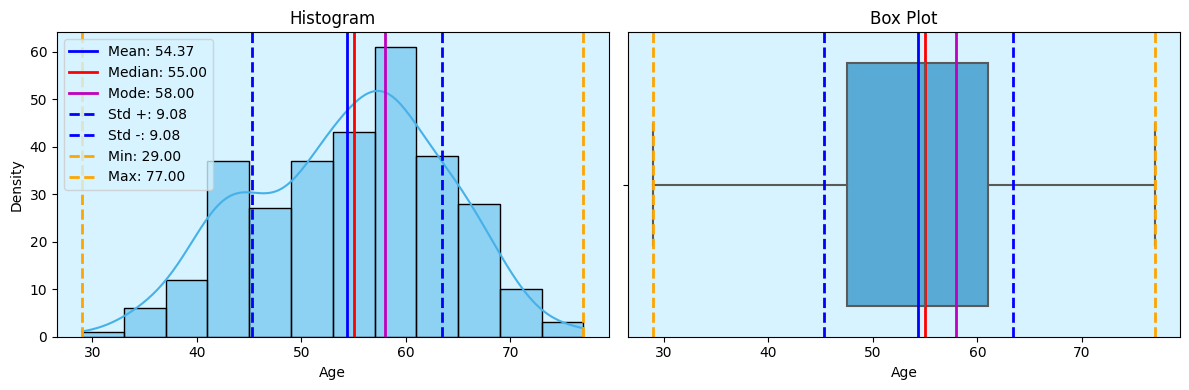

In [21]:
box_hist_plot("Age")

In [22]:
skewness_dist(df_eda, "Age")

Skewness of the Age variable: -0.202
The distribution is left-skewed.


<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <h2 style="color:#4169e1;">Age Distribution</h2>
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:20px; font-family:calibri; text-indent: 20px;">
        <ul style="font-size:18px; font-family:calibri;">
            <li><b style="color: #0f52ba;">Mean:</b> The average age of the population is <b>54 years</b>. This provides insight into the central tendency of the age distribution.</li>
            <li><b style="color: #0f52ba;">Median:</b> At <b>55 years</b>, this value divides the dataset into two equal parts, with half the population being younger and half older.</li>
            <li><b style="color: #0f52ba;">Mode:</b> The most common is <b>58 years</b>. It shows the age with the highest frequency.</li>
            <li><b style="color: #0f52ba;">Standard Deviation:</b> With a spread of approximately <b>9 years</b> around the average, this measure quantifies the variability of ages within the population.</li>
        </ul>
        <em>The calculated skewness value of <b>-0.202</b> confirms the left-skewed nature of the age distribution. This implies a concentration of individuals towards older ages. The youngest person in the dataset is <b>29 years old</b>, and the oldest is <b>77 years old</b>.</em>
    </p>
</div>


<div style="background-color:#4169e1; padding: 1px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:20px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; text-indent: 20px;color: #f0f8ff;">
Outliers of <b>Age</b> variable:
    </p>
</div>

In [23]:
age_outliers, age_lower_bound, age_upper_bound = find_outliers(df_eda['Age'])

print("Lower Bound:", age_lower_bound)
print("Upper Bound:", age_upper_bound)
print("Outliers:", len(age_outliers))

Lower Bound: 27.25
Upper Bound: 81.25
Outliers: 0


In [24]:
outliers.update({"Age":len(age_outliers)})

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;">There are no <b>outliers</b> in <b>Age</b> variable.
    </p>
</div>

<a id="sex"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.2 |</span><span style='color:#6495ed;font-size:20px;'> Sex</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

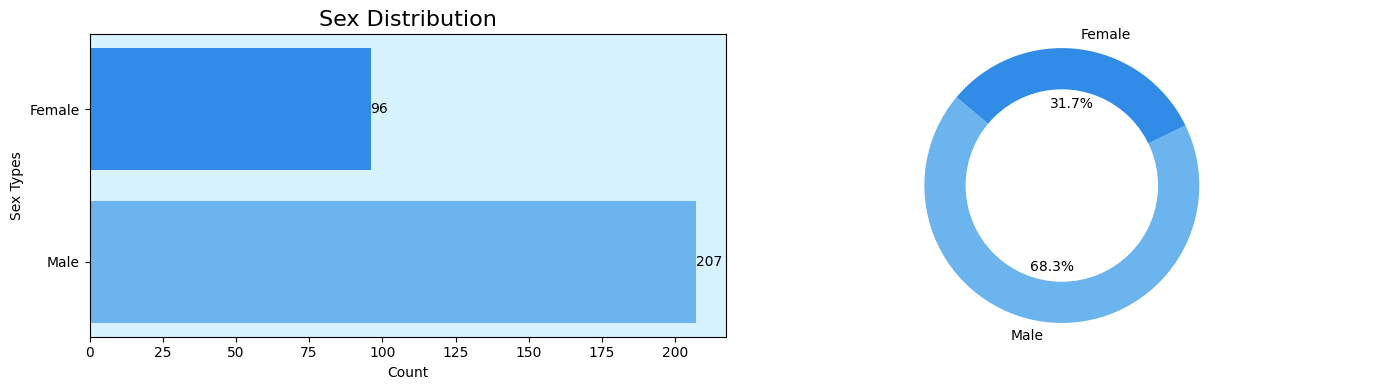

In [25]:
bar_donut_chart("Sex")

<a id="cp"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.3 |</span><span style='color:#6495ed;font-size:20px;'> Chest Pain</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

<div style="background-color:#4169e1; padding: 1px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:20px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; text-indent: 20px;color: #f0f8ff;">
Number of each category for Chest Pain variable:
    </p>
</div>

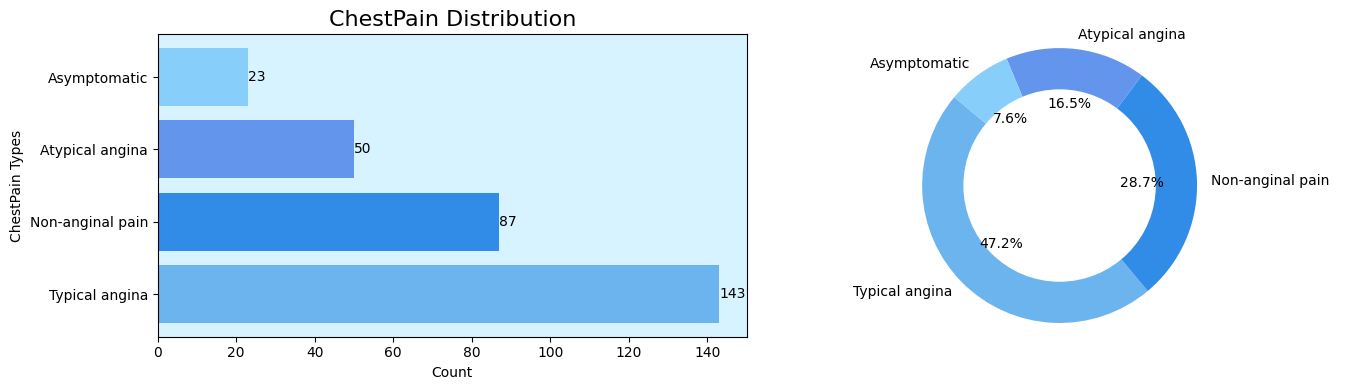

In [26]:
bar_donut_chart("ChestPain")

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
  <h2 style="color:#4169e1;">Types of Chest Pain</h2>
  <p>
    <ul>
      <li><b style="color: #0f52ba;">Typical Angina:</b> Feels like pressure or tightness in your chest, especially when you're active or stressed. Rest or medicine can help it go away.</li>
      <li><b style="color: #0f52ba;">Non-Anginal Pain:</b> Doesn't follow the usual chest pain pattern. It can be sharp, stabbing, or burning, often caused by things like muscle strains or feeling anxious.</li>
      <li><b style="color: #0f52ba;">Atypical Angina:</b> Similar to typical angina but less predictable. It might still have to do with your heart, but it doesn't show up in the usual way.</li>
      <li><b style="color: #0f52ba;">Asymptomatic:</b> No chest pain at all. You might have heart issues, but you don't feel any symptoms.</li>
    </ul>
  </p>
</div>


<a id="rbp"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.4 |</span><span style='color:#6495ed;font-size:20px;'> Resting Blood Pressure</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

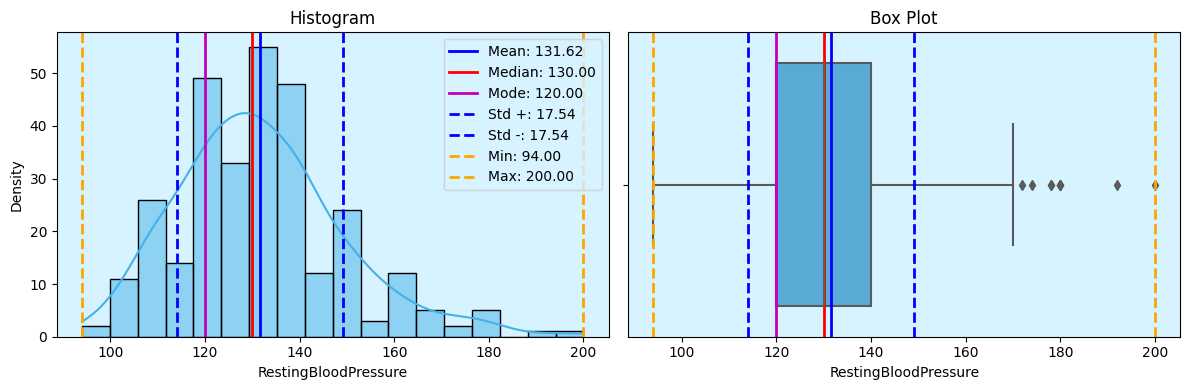

In [27]:
box_hist_plot("RestingBloodPressure")

In [28]:
skewness_dist(df_eda, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.714
The distribution is right-skewed.


<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
  <h2 style="color:#4169e1;">Resting Blood Pressure Distribution</h2>
  <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:20px; font-family:calibri; text-indent: 20px;">
    <ul style="font-size:18px; font-family:calibri;">
      <li><b style="color: #0f52ba;">Mean:</b> The average resting blood pressure is <b>131.62 mmHg</b>, providing a central measure of the distribution.</li>
      <li><b style="color: #0f52ba;">Median:</b> At <b>130 mmHg</b>, this value divides the dataset into two halves, with 50% of individuals having blood pressures below this point and 50% above it.</li>
      <li><b style="color: #0f52ba;">Mode:</b> The most frequent blood pressure is <b>120 mmHg</b>, representing the most common value observed in the dataset.</li>
      <li><b style="color: #0f52ba;">Standard Deviation:</b> With a value of <b>17.54 mmHg</b>, it measures the spread of blood pressures around the mean, indicating the degree of variability within the population.</li>
    </ul>
    <em>Additionally, the minimum resting blood pressure recorded is <b>94 mmHg</b>, and the maximum is <b>200 mmHg</b>. These values define the overall range of blood pressures observed in the dataset.</em> Skewness of the Resting Blood Pressure variable: <b>0.714</b>. The distribution is <b>right-skewed</b>.
  </p>
</div>


<div style="background-color:#4169e1; padding: 1px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:20px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; text-indent: 20px;color: #f0f8ff;">
Outliers of Resting Blood Pressure column:
    </p>
</div>

In [29]:
rbp_outliers, rbp_lower_bound, rbp_upper_bound = find_outliers(df_eda['RestingBloodPressure'])

print("Lower Bound:", rbp_lower_bound)
print("Upper Bound:", rbp_upper_bound)
print("Outliers:", len(rbp_outliers))

Lower Bound: 90.0
Upper Bound: 170.0
Outliers: 9


In [30]:
outliers.update({"RestingBloodPressure":len(rbp_outliers)})

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;">There are <b>9</b> <b>outliers</b> in <b>RestingBloodPressure</b> variable.
    </p>
</div>

<a id="c"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.5 |</span><span style='color:#6495ed;font-size:20px;'> Cholesterol</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;"> 
    <p style="font-size:18px; font-family:Calibri, sans-serif; text-align: justify;">
        <h3 style="color:#4169e1;">Serum Cholesterol:</h3><br>
        <p style="font-size:18px; font-family:Calibri, sans-serif;line-height: 1.5em; text-align: justify; text-indent: 20px;">It measured in milligrams per deciliter (mg/dl), is important for heart health. It shows the amount of cholesterol in the blood, including LDL or "bad" cholesterol, and HDL or "good" cholesterol. High LDL levels can block arteries, leading to heart problems. But higher HDL levels are good because they help remove LDL from the blood, lowering the risk of heart issues.<br><br>
    </p>
</div>


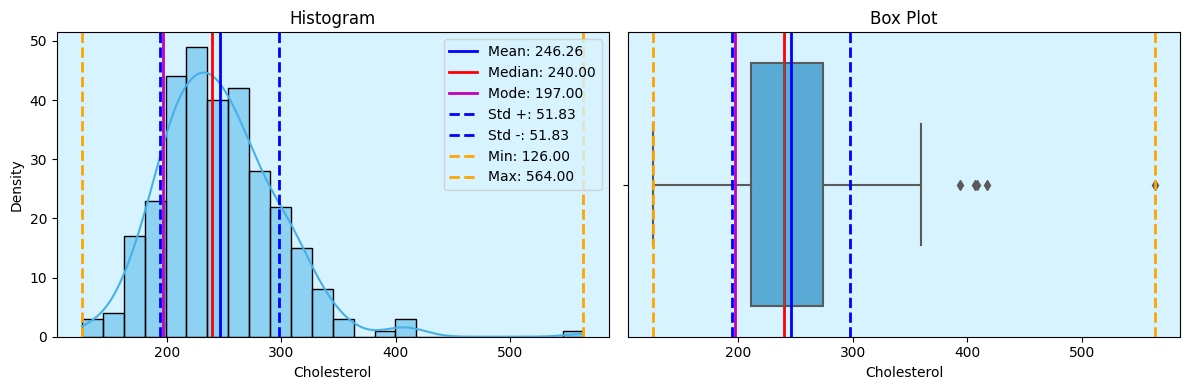

In [31]:
box_hist_plot("Cholesterol")

⬆️ [Back To Skewness Function](#skewness)

In [32]:
skewness_dist(df_eda, "Cholesterol")

Skewness of the Cholesterol variable: 1.143
The distribution is right-skewed.


<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
  <h2 style="color:#4169e1;">Cholesterol Distribution</h2>
  <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:20px; font-family:calibri; text-indent: 20px;">
    <ul style="font-size:18px; font-family:calibri;">
      <li><b style="color: #0f52ba;">Mean:</b> The average cholesterol level is <b>246.26</b>, representing the central tendency of the distribution.</li>
      <li><b style="color: #0f52ba;">Median:</b> The median cholesterol level is <b>240</b>, indicating the middle value of the dataset.</li>
      <li><b style="color: #0f52ba;">Mode:</b> The most frequent cholesterol level is <b>197</b>, representing the most common value observed in the dataset.</li>
      <li><b style="color: #0f52ba;">Standard Deviation:</b> With a value of <b>51.83</b>, it measures the spread of cholesterol levels around the mean.</li>
    </ul>
    <em>The skewness of the cholesterol variable is <b>1.143</b>, indicating a right-skewed distribution. A right-skewed distribution means that there are more individuals with lower cholesterol levels and fewer individuals with higher cholesterol levels compared to a symmetric distribution.</em>
  </p>
</div>


<div style="background-color:#4169e1; padding: 1px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:20px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; text-indent: 20px;color: #f0f8ff;">
Outliers of Cholesterol variable based on IQR in boxplot:
    </p>
</div>

In [33]:
ch_outliers, ch_lower_bound, ch_upper_bound = find_outliers(df_eda['Cholesterol'])

print("Lower Bound:", ch_lower_bound)
print("Upper Bound:", ch_upper_bound)
print("Outliers:", len(ch_outliers))

Lower Bound: 115.75
Upper Bound: 369.75
Outliers: 5


In [34]:
outliers.update({"Cholesterol":len(ch_outliers)})

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;">There are <b>5</b> <b>outliers</b> in <b>Cholesterol</b> variable.
    </p>
</div>

<a id="fbs"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.6 |</span><span style='color:#6495ed;font-size:20px;'> Fasting Blood Sugar</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;"> 
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;">
        <h3 style="color:#4169e1;">Definition</h3><br>
        It indicates the amount of glucose in the blood, measured in milligrams per deciliter (mg/dl). Normal levels range from 70 to 120 mg/dl, especially after an 8-hour fast. Elevated levels can signal conditions like diabetes.<br><br>
        <h3 style="color:#4169e1;">Fasting Blood Sugar Levels</h3><br>
        <b style="color:#4169e1;">0: Below 120 mg/dl (False)</b> - Indicates normal blood sugar levels.<br>
        <b style="color:#4169e1;">1: Above 120 mg/dl (True)</b> - Indicates elevated blood sugar levels, possibly signaling diabetes or prediabetes.
</div>


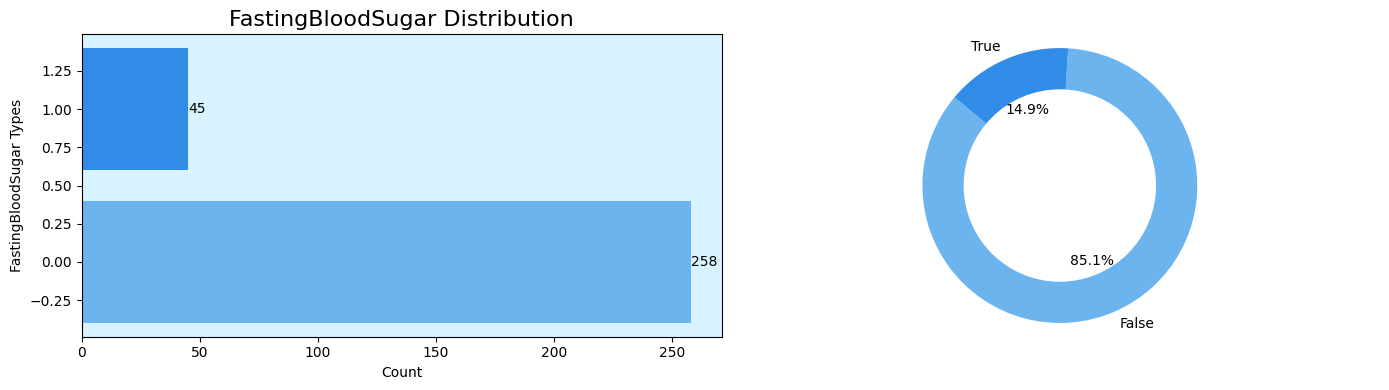

In [35]:
bar_donut_chart("FastingBloodSugar")

<a id="ecg"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.7 |</span><span style='color:#6495ed;font-size:20px;'> Resting ECG</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;">
        <h3 style="color:#4169e1;">What is an Electrocardiogram (ECG)?</h3><br>
        An Electrocardiogram (ECG or EKG) is a common test that checks how your heart is working by recording its electrical activity. It's a painless and non-invasive procedure that helps doctors diagnose various heart conditions. A resting ECG, done while you're at rest, provides valuable information about your heart's health.<br><br>
        <h3  style="color:#4169e1;">ECG Test Results</h3>
        <p>
            When you receive your ECG results, it's crucial to understand what they indicate. Here's a simple explanation:
            <br><br>
            <b style="color:#4169e1;">0: Normal</b> - Your heart is functioning normally when you're at rest. There are no signs of abnormalities in your heart's electrical activity.
            <br><br>
            <b style="color:#4169e1;">1: Having ST-T wave abnormality</b> - This result suggests there may be a slight irregularity in your heart rhythm, potentially indicating issues with blood flow to the heart muscle. Further tests are required to confirm and evaluate the severity of the condition.
            <br><br>
            <b style="color:#4169e1;">2: Showing probable or definite left ventricular hypertrophy</b> - If your ECG indicates left ventricular hypertrophy, it means the muscular wall of the heart's main pumping chamber (the left ventricle) is thickened. This thickening may be caused by conditions like high blood pressure or heart disease. Additional tests are necessary to confirm the diagnosis and determine appropriate treatment.
        </p>
    </p>
</div>


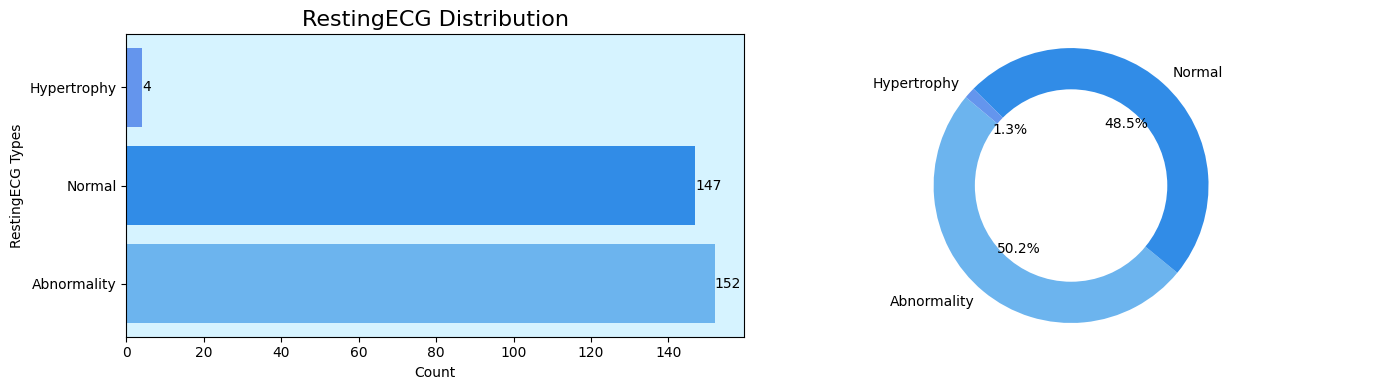

In [36]:
bar_donut_chart("RestingECG")

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;"> 
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;">
        <h3 style="color:#4169e1;">ECG Test Results</h3><br>
        <ul>
        <li><b>147 samples</b> show a normal reading.<br></li>
        <li><b>152 samples</b> show an abnormality.<br></li>
        <li><b>4 samples</b> show signs of left ventricular hypertrophy (thickening).</li>
    </ul>
    </p>
</div>


<a id="mhr"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.8 |</span><span style='color:#6495ed;font-size:20px;'> Max Heart Rate</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

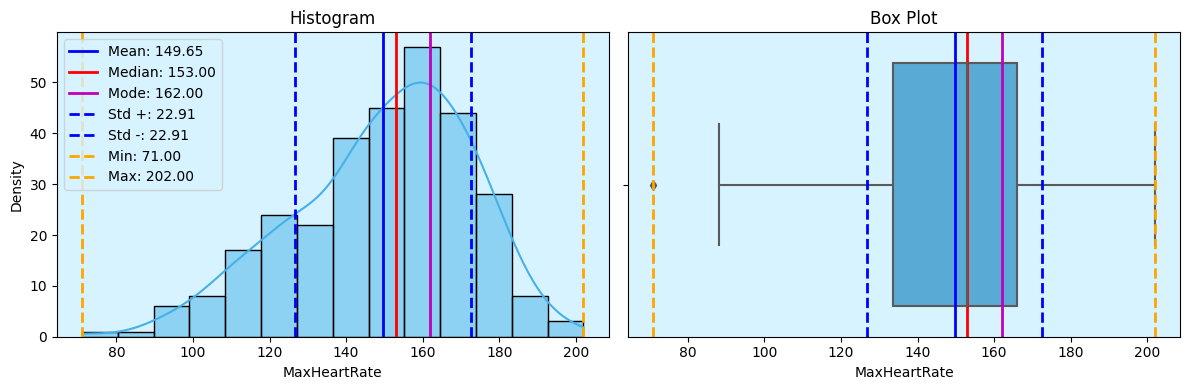

In [37]:
box_hist_plot("MaxHeartRate")

In [38]:
skewness_dist(df_eda, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.537
The distribution is left-skewed.


 <div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <h2 style="color:#4169e1;">Max Heart Rate Distribution</h2>
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:20px; font-family:calibri; text-indent: 20px;">
       <ul style="font-size:18px; font-family:calibri;">
            <li><b style="color: #0f52ba;">Mean:</b> The average maximum heart rate is <b>149.65</b>, representing the central value of the distribution.</li>
            <li><b style="color: #0f52ba;">Median:</b> The median maximum heart rate is <b>153</b>, indicating the middle value when the data is ordered from lowest to highest.</li>
            <li><b style="color: #0f52ba;">Mode:</b> The most frequent maximum heart rate is <b>162</b>, representing the most common value observed in the dataset.</li>
            <li><b style="color: #0f52ba;">Standard Deviation:</b> With a value of <b>22.91</b>, it measures the spread of maximum heart rates around the mean.</li>
       </ul>
       <em>The skewness of the MaxHeartRate variable is <b>-0.537</b>, indicating a left-skewed distribution. A left-skewed distribution means that there are more individuals with higher maximum heart rates and fewer individuals with lower maximum heart rates compared to a symmetric distribution.</em>
    </p>
</div>


In [39]:
ecg_outliers, ecg_lower_bound, ecg_upper_bound = find_outliers(df_eda['MaxHeartRate'])

print("Lower Bound:", ecg_lower_bound)
print("Upper Bound:", ecg_upper_bound)
print("Outliers':", len(ecg_outliers))

Lower Bound: 84.75
Upper Bound: 214.75
Outliers': 1


In [40]:
outliers.update({"MaxHeartRate":len(ecg_outliers)})

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;">There are <b>1</b> <b>outlier</b> in <b>MaxHeartRate</b> variable.
    </p>
</div>

<a id="ea"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.9 |</span><span style='color:#6495ed;font-size:20px;'> Excercise Angina</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;">Exercise-induced angina is when your heart doesn't get enough oxygen during physical activity, causing chest pain. This happens because the arteries that supply blood to the heart are narrowed or blocked.
    </p>
</div>

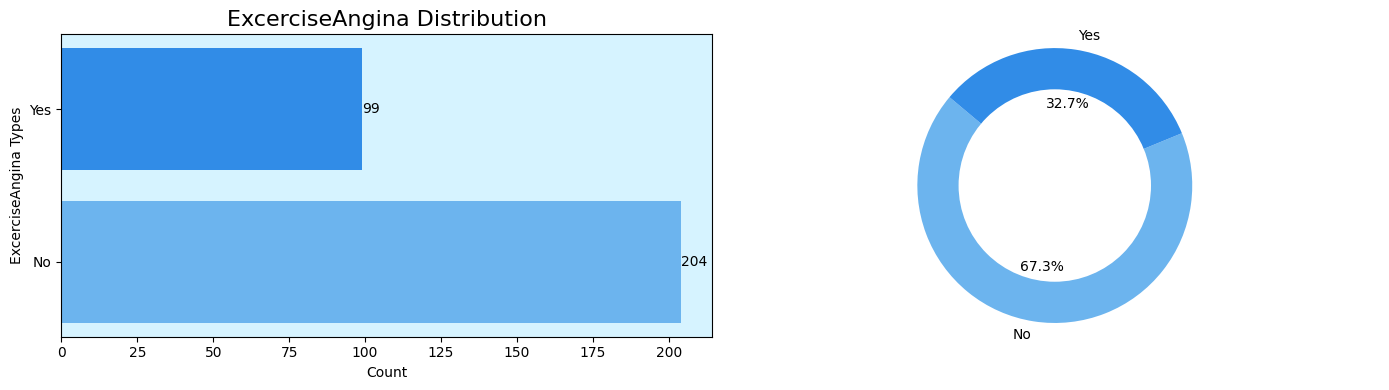

In [41]:
bar_donut_chart("ExcerciseAngina")

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <h2 style="color:#4169e1;">Exercise-induced Angina Distribution</h2>
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:20px; font-family:calibri; text-indent: 20px;">
       <ul style="font-size:18px; font-family:calibri;">
            <li><b style="color: #0f52ba;">Yes:</b> There are 99 (<em>32.7%</em>) samples indicating that individuals experienced exercise-induced angina.</li>
            <li><b style="color: #0f52ba;">No:</b> There are 204 (<em>67.3%</em>) samples indicating that individuals did not experience exercise-induced angina.</li>
       </ul>
    </p>
</div>

<a id="op"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.10 |</span><span style='color:#6495ed;font-size:20px;'> Old Peak</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

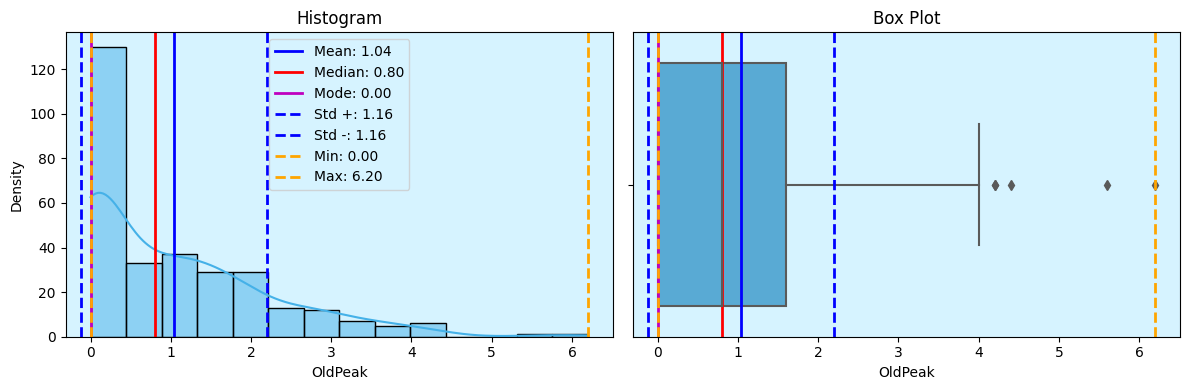

In [42]:
box_hist_plot("OldPeak")

In [43]:
skewness_dist(df_eda, "OldPeak")

Skewness of the OldPeak variable: 1.270
The distribution is right-skewed.


 <div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <h2 style="color:#4169e1;">OldPeak Distribution</h2>
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:20px; font-family:calibri; text-indent: 20px;">
       <ul style="font-size:18px; font-family:calibri;">
            <li><b style="color: #0f52ba;">Mean:</b> The average OldPeak value is <b>1.04</b>, representing the central value of the distribution.</li>
            <li><b style="color: #0f52ba;">Median:</b> The median OldPeak value is <b>0.80</b>, indicating the middle value when the data is ordered from lowest to highest.</li>
            <li><b style="color: #0f52ba;">Mode:</b> The most frequent OldPeak value is <b>0.00</b>, representing the most common value observed in the dataset.</li>
            <li><b style="color: #0f52ba;">Standard Deviation:</b> With a value of <b>1.16</b>, it measures the spread of OldPeak values around the mean.</li>
       </ul>
       <em>The skewness of the OldPeak variable is <b>1.270</b>, indicating a right-skewed distribution. A right-skewed distribution means that there are more individuals with lower OldPeak values and fewer individuals with higher OldPeak values compared to a symmetric distribution.</em>
    </p>
</div>


In [44]:
op_outliers, op_lower_bound, op_upper_bound = find_outliers(df_eda['OldPeak'])

print("Lower Bound:", op_lower_bound)
print("Upper Bound:", op_upper_bound)
print("Outliers':", len(op_outliers))

Lower Bound: -2.4000000000000004
Upper Bound: 4.0
Outliers': 5


In [45]:
outliers.update({"OldPeak":len(op_outliers)})

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;">There are <b>5</b> <b>outliers</b> in <b>OldPeak</b> variable.
    </p>
</div>

<a id="slope"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.11 |</span><span style='color:#6495ed;font-size:20px;'> STSlope</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;">The slope of the peak exercise ST segment indicates how the ST segment moves during exercise, which is a part of an electrocardiogram (ECG).</p>
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;">During a stress test, patients exercise while their heart's activity is monitored. Changes in the ST segment's slope can signal heart problems. A normal slope is horizontal or upwards. A downward slope may indicate heart issues, like reduced blood flow. Doctors use this info to diagnose and treat heart conditions.</p>
</div>


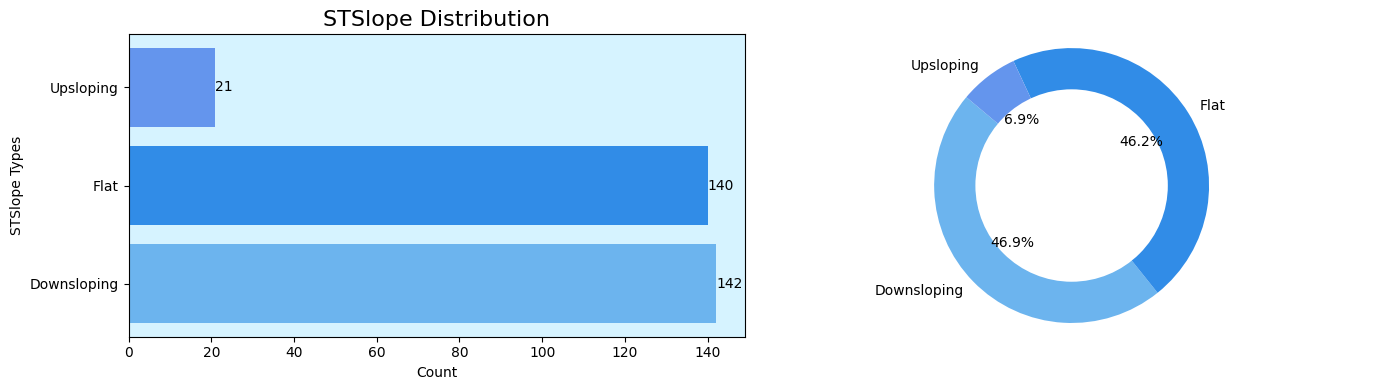

In [46]:
bar_donut_chart("STSlope")

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:20px; font-family:calibri; text-indent: 20px;">
        <ul style="font-size:18px; font-family:calibri;">
            <li><b style="color: #0f52ba;">Upsloping (0):</b> In 21 samples, the ST segment goes up during exercise, which might be a normal response.</li>
            <li><b style="color: #0f52ba;">Flat or Horizontal (1):</b> There are 140 samples where the ST segment stays level during exercise. This might need extra attention as it's not the usual response.</li>
            <li><b style="color: #0f52ba;">Downsloping (2):</b> 142 samples show the ST segment sloping downwards during exercise. This could indicate potential heart issues, like reduced blood flow, and might need further investigation.</li>
        </ul>
    </p>
</div>


<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">You can access more details about this variable in this
        <a style="color: white;" href="https://litfl.com/st-segment-ecg-library/">Source</a>
    </p>
</div>

<a id="vessels"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.12 |</span><span style='color:#6495ed;font-size:20px;'> n Major Vessels</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

<div style="display: flex; background-color:#f0f8ff;">
    <div style="flex: 50%; padding-left: 20px; padding-top: 1px; text-align: justify;padding-right: 25px; font-size:18px; font-family:calibri; line-height: 1.3em;">
        <h2 style="color:#4169e1;">Fluoroscopy & Coronary Arteries</h2>
        <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify;">
            <ul style="font-size:18px; font-family:calibri;">
                <li><b style="color: #0f52ba;">Fluoroscopy:</b> It's a real-time imaging technique using X-rays to visualize internal organs, commonly used for heart and blood vessel issues.</li>
                <li><b style="color: #0f52ba;">Coronary Angiography:</b> A procedure where a catheter is inserted into an artery and a contrast dye is injected, making heart blood vessels visible on the fluoroscopy screen.</li>
                <li><b style="color: #0f52ba;">Variations in Coronary Arteries:</b> Some individuals may have different coronary artery anatomy, affecting the number of vessels visible on fluoroscopy.</li>
                <li><b style="color: #0f52ba;">Effect of Coronary Artery Disease (CAD):</b> It can impact vessel visibility on fluoroscopy, as narrowed arteries may not fully appear. It's a condition where plaque buildup narrows the coronary arteries, reducing blood flow to the heart.</li>
            </ul>
        </p>
    </div>
</div>

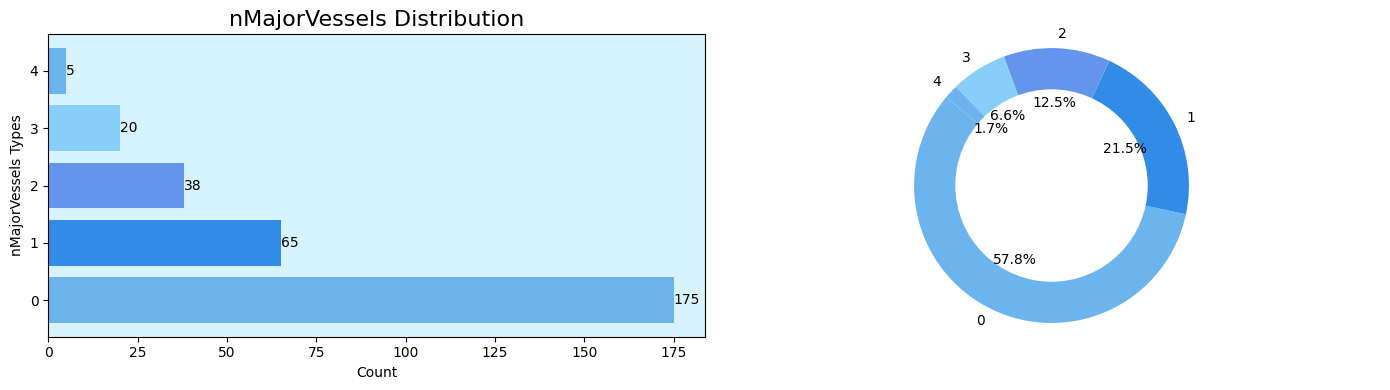

In [47]:
bar_donut_chart("nMajorVessels")

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff; line-height: 1.2;">
    <h2 style="color:#4169e1;">Vessels Colored in Fluoroscopy</h2>
    <p style="font-size:18px; font-family:calibri;">
        <b>The number of colored vessels seen through fluoroscopy helps detect possible heart issues:</b>
        <ul style="font-size:18px; font-family:calibri;">
            <li><b style="color: #0f52ba;">0 vessels colored:</b> There are <b>175 samples</b> showing no apparent narrowing or blockage in major coronary arteries.</li>
            <li><b style="color: #0f52ba;">1 vessel colored:</b> There are <b>65 samples</b> suggesting narrowing or blockage in a major coronary artery.</li>
            <li><b style="color: #0f52ba;">2 vessels colored:</b> There are <b>38 samples</b> indicating likely narrowing or blockage in two major coronary arteries.</li>
            <li><b style="color: #0f52ba;">3 vessels colored:</b> There are <b>20 samples</b> often signifying narrowing or blockage in all three major coronary arteries.</li>
            <li><b style="color: #0f52ba;">4 vessels colored:</b> There are <b>5 samples</b> associated with a rare finding, potentially indicating a congenital heart defect or complex heart condition.</li>
        </ul>
    </p>
</div>


<a id="th"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.13 |</span><span style='color:#6495ed;font-size:20px;'> Thalium</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

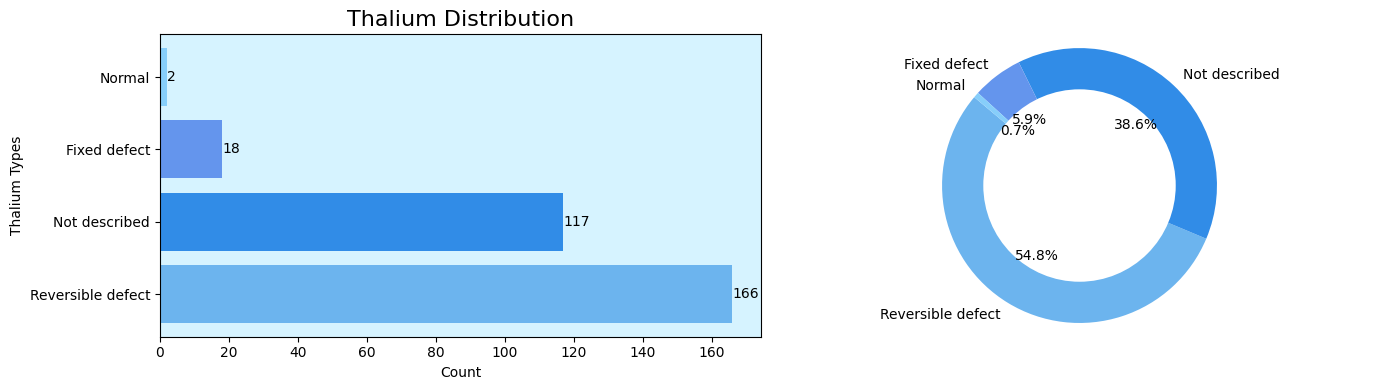

In [48]:
bar_donut_chart("Thalium")

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <h2 style="color:#4169e1;">Thallium Stress Test Results:</h2>
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:20px; font-family:calibri; text-indent: 20px;">
        <ul style="font-size:18px; font-family:calibri;">
            <li><b style="color: #0f52ba;">Reversible defect (166 samples):</b> In 166 cases, there was less blood flow to a part of the heart during exercise, but it got better when at rest.</li>
            <li><b style="color: #0f52ba;">Not described (117 samples):</b> In 117 cases, the test results were unclear or didn't fit into the usual categories.</li>
            <li><b style="color: #0f52ba;">Fixed defect (18 samples):</b> In 18 cases, there was a constant area of reduced blood flow to the heart, both during exercise and at rest, indicating a long-standing issue.</li>
            <li><b style="color: #0f52ba;">Normal (2 samples):</b> Only 2 samples showed normal results, meaning good blood flow to the heart both at rest and during exercise.</li>
        </ul>
    </p>
</div>

<a id="status"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>🫀 Step 4.1.14 |</span><span style='color:#6495ed;font-size:20px;'> Status</span></b>

⬆️ [Back To Univariate Analysis](#univariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

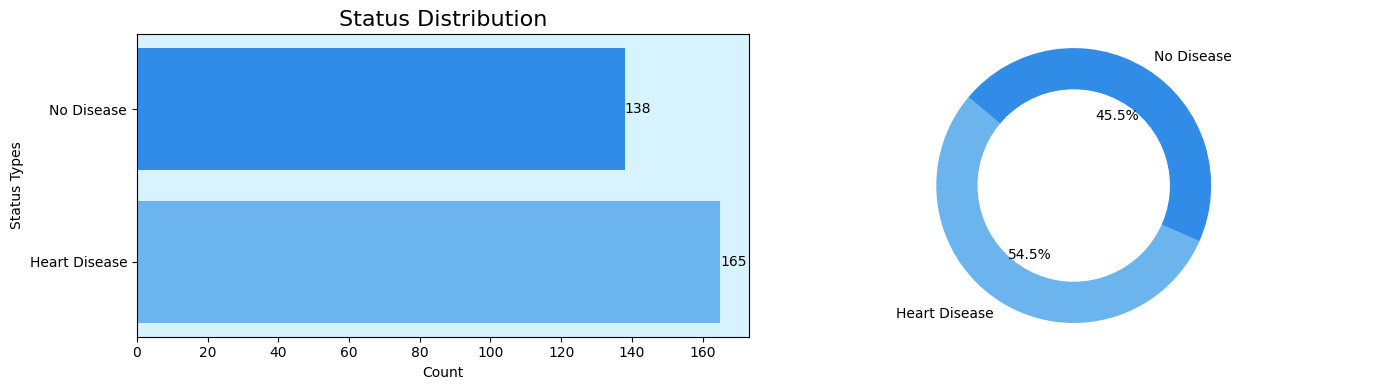

In [49]:
bar_donut_chart("Status")

<a id="bivariate"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 4.2 |</span><span style='color:#6495ed;font-size:20px;'> Bivariate Analysis 🫀</span></b>

⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

<a id="numerical_bivariate"></a>
# <p style="background-color: #4169e1; padding: 1px; border-radius: 15px;color:white; font-size:30px; font-family:Calibri; text-align:center;line-height: 1.5em; border-radius:100px 20px;">📊 4.2.1 | Numerical Variables</p>

⬆️ [Back To Bivariate Analysis](#bivariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

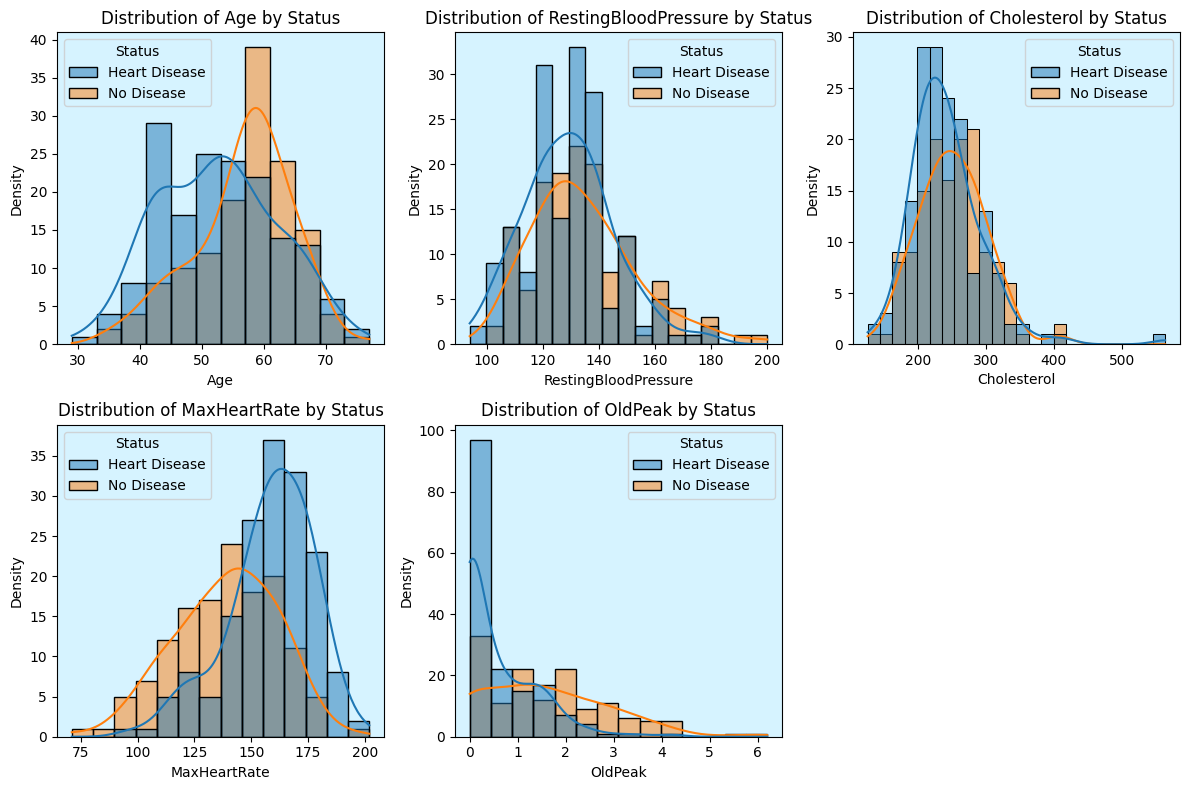

In [50]:
numerical_features = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=df_eda, x=feature, hue='Status', kde=True, fill=True, ax=ax)
    ax.set_title(f'Distribution of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

axes[1, 2].remove()

plt.tight_layout()
plt.show()

<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">
        Blue plots showing the distribution of people with heart disease and the orange plot showing the distribution of people with no heart disease. In fact, they are showing the distribution of each numerical variable with target variable (Status).
    </p>
</div>

<a id="categorical_bivariate"></a>
# <p style="background-color: #4169e1; padding: 1px; border-radius: 15px;color:white; font-size:30px; font-family:Calibri; text-align:center;line-height: 1.5em; border-radius:100px 20px;">📊 4.2.2 | Binary & Categorical Variables</p>

⬆️ [Back To Bivariate Analysis](#bivariate) ⬆️ [Back To EDA](#eda) ⬆️ [Tabel of Contents](#contents_table) 

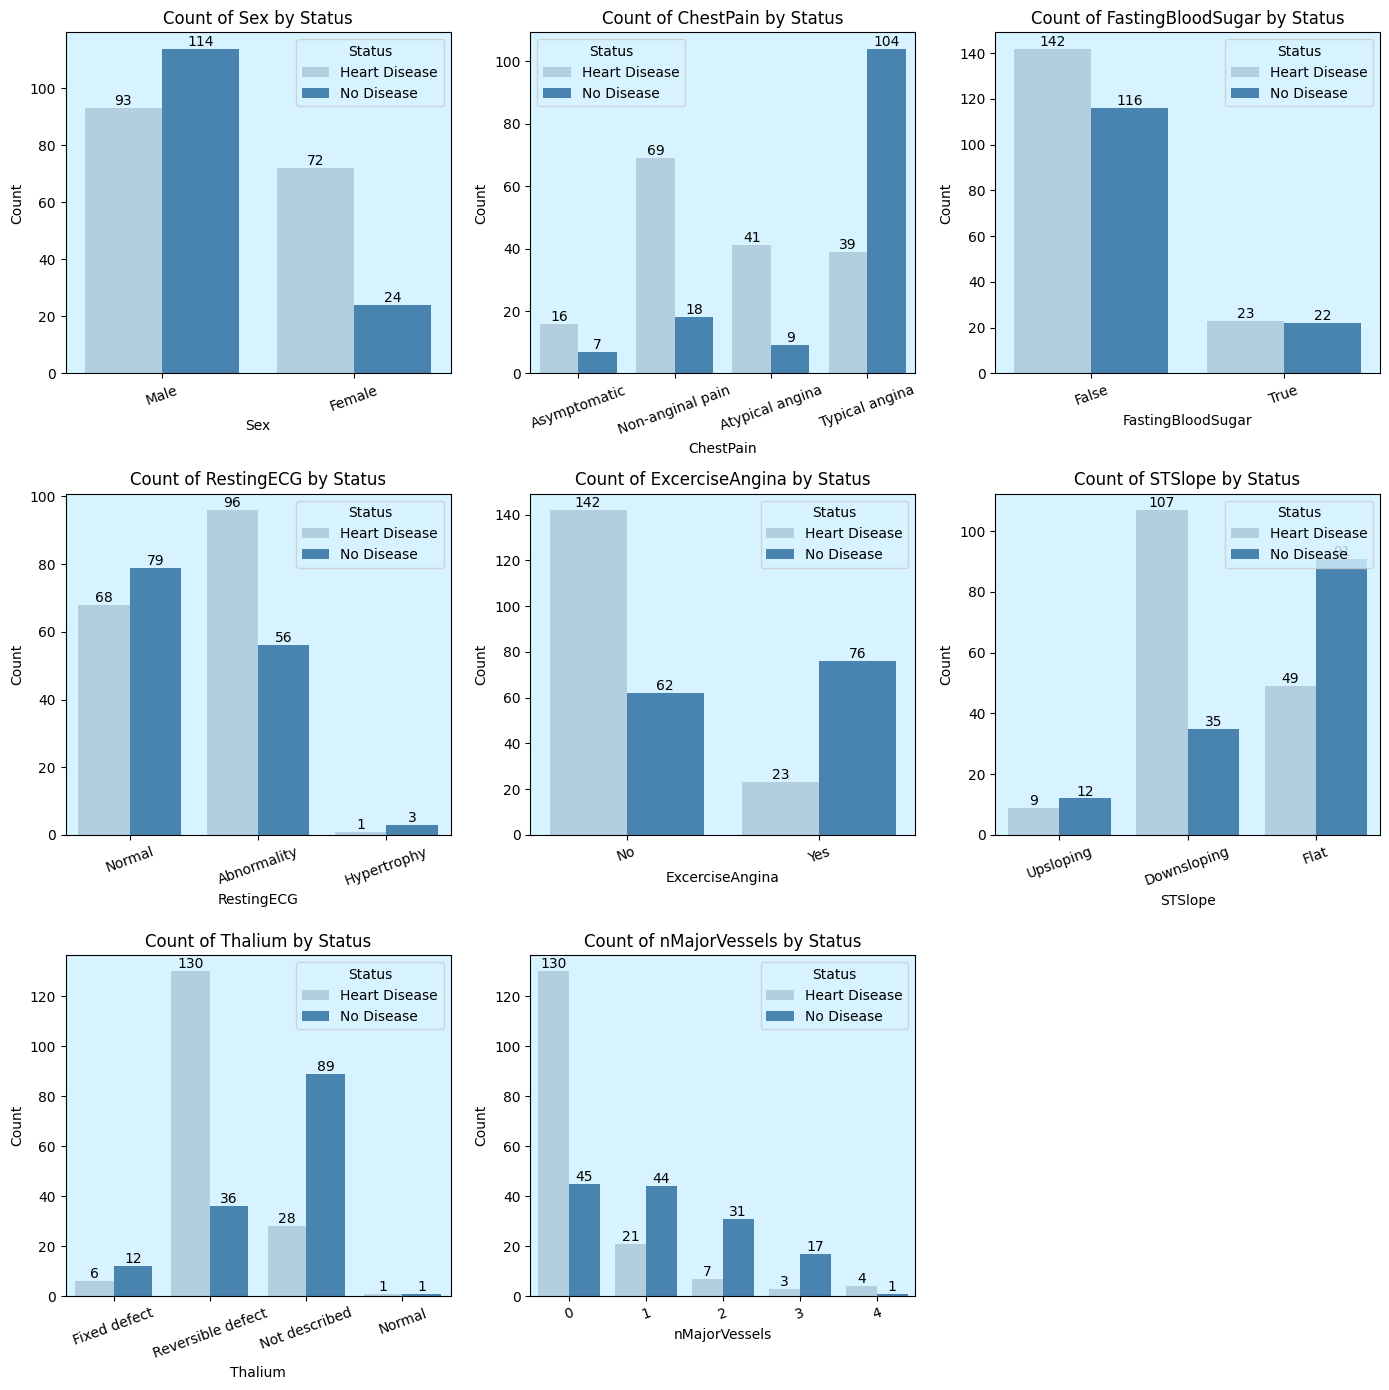

In [51]:
categorical_features = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingECG', 'ExcerciseAngina', 'STSlope', 'Thalium', 'nMajorVessels']

num_features = len(categorical_features)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 14))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(data=df_eda, x=feature, hue='Status', ax=ax, palette='Blues')
    ax.set_title(f'Count of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    color='black')

for i in range(num_rows):
    for j in range(num_cols):
        if i * 3 + j >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">
        Blue plots showing the distribution of people with heart disease and the orange plot showing the distribution of people with no heart disease. In fact, they are showing the distribution of each categorical variable with target variable (Status).
    </p>
</div>

<a id="preprocessing"></a>
<div class="hover-effect" id="setup">
        <p class="text"><b>👨🏻‍⚕️ Step 5 | Preprocessing</b></p>
        <div class="overlay"></div>
</div>

<a id="outliers"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 5.1 |</span><span style='color:#6495ed;font-size:20px;'> Handling Outliers 🫀</span></b>

⬆️ [Table of Contents](#contents_table)

<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">
        In this dataframe, we can see the number of outliers for each of these numerical variables that detected using IQR:
    </p>
</div>

In [52]:
outliers_df = pd.DataFrame(list(outliers.items()), columns=['Variable', 'Outliers'])
outliers_df

,Variable,Outliers
0,Age,0
1,RestingBloodPressure,9
2,Cholesterol,5
3,MaxHeartRate,1
4,OldPeak,5


<a id="boxcox"></a>
# <b><span style='color:#45b1e8; font-size:18px;'>📊 5.1.1 | </span><span style='color:#6495ed;font-size:18px;'> Box-Cox Transformation </span></b>

⬆️ [Table of Contents](#contents_table)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <h2 style="color:#4169e1;">What is Box-Cox Transformation ?</h2>
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:20px; font-family:calibri; text-indent: 20px;">
        The <b>Box-Cox transformation</b> is a statistical method used to <b>stabilize the variance</b> and make data more <b>normally distributed</b>. It's a way to transform <b>non-normally distributed</b> data into normally distributed data by raising it to a power, which can be calculated based on the data itself.
    </p>
</div>


<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">
        More details about this transformation in this <a style="color: white;" href="https://www.statisticshowto.com/probability-and-statistics/normal-distributions/box-cox-transformation/">Source</a>
    </p>
</div>

In [53]:
def box_cox_transform(df):
    """
    It automatically applies the Box-Cox transformation to the specified numerical variables
    in a our dataFrame, finding the optimal lambda value for each variable.
    It enhances data distribution for machine learning by addressing skewness and variance issues.
    """
    
    transformed_df = df.copy()
    features_to_transform = ["Age", "RestingBloodPressure", "Cholesterol", "MaxHeartRate", "OldPeak"]

    for feature in features_to_transform:
        if np.any(df[feature] <= 0):
            min_value = abs(df[feature].min()) + 1
            df[feature] += min_value
        transformed_feature, lambda_value = boxcox(df[feature])
        transformed_df[feature] = transformed_feature

    return transformed_df

In [54]:
def plot_transform(df, transformed_df, variable):
    """
    function to show the results of transformations on each variable, 
    in a way to see the comparisons before and after applying Box-Cox transformation
    to have a better understanding visually.
    """
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

    sns.boxplot(x=df[variable], ax=axes[0, 0], color='#00308F') 
    axes[0, 0].set_title(f"Original {variable}")

    sns.boxplot(x=transformed_df[variable], ax=axes[0, 1], color='#7CB9E8') 
    axes[0, 1].set_title(f"Transformed {variable}")

    sns.histplot(df[variable], ax=axes[1, 0], kde=True, color='#00308F')  
    axes[1, 0].set_title(f"Original {variable} Distribution")

    sns.histplot(transformed_df[variable], ax=axes[1, 1], kde=True, color='#7CB9E8') 
    axes[1, 1].set_title(f"Transformed {variable} Distribution")

    plt.tight_layout()
    plt.show()

In [55]:
transformed_df = box_cox_transform(df)

<a id="nboxcox"></a>
# <b><span style='color:#45b1e8; font-size:18px;'>📊 5.1.2 | </span><span style='color:#6495ed;font-size:18px;'> Numerical Variables After Box-Cox Transformation </span></b>

⬆️ [Table of Contents](#contents_table)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <h2 style="color:#4169e1;">Why did I use Box-Cox Transformation ?</h2>
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:20px; font-family:calibri; text-indent: 20px;">
        In this scenario, certain <b>numerical</b> variables exhibit <b>skewness</b> in their <b>distributions</b> due to <b>outliers</b>. By employing the <b>Box-Cox</b> transformation, I aim to decrease this skewness as much as possible, ultimately moving the distribution towards a more <b>normal</b> shape. The <b>objective</b> is to <b>minimize skewness</b>, ideally bringing it <b>closer to zero</b>. This method helps <b>reduce</b> the effect of outliers on our <b>machine learning</b> models.
    </p>
</div>


<div style="background-color:#5D76A9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff; text-align: center;">
    <b><span style='color:#45b1e8; font-size:18px;'>📊 </span><span style='color:#F0F8FF;font-size:18px;'><b>Age</b> variable 📊</span></b>
</div>


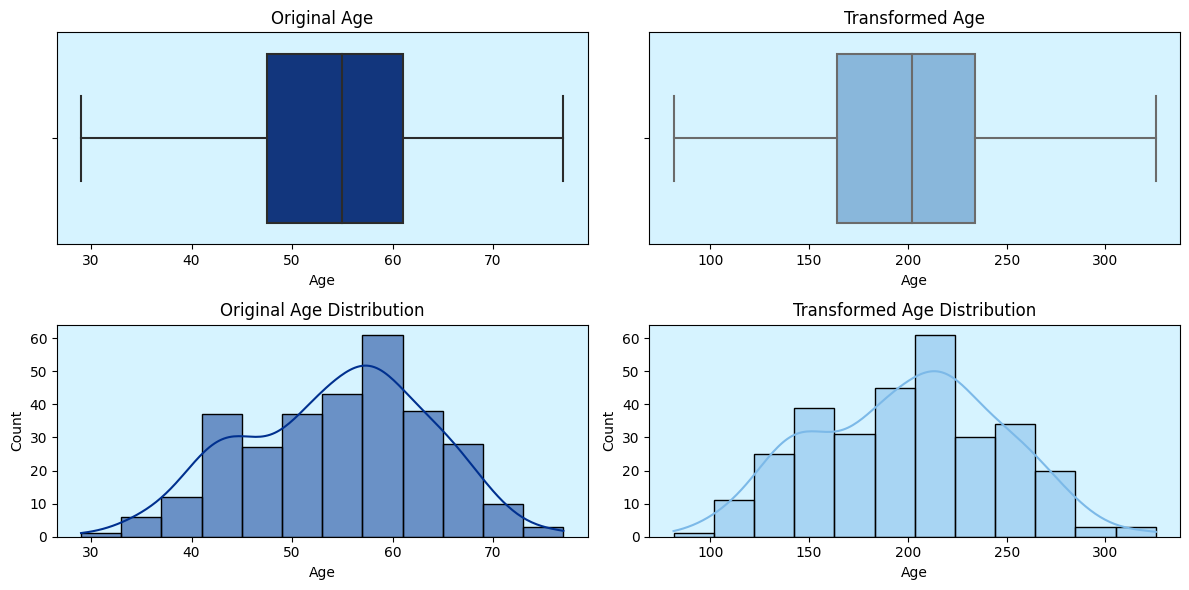

In [56]:
plot_transform(df, transformed_df, 'Age')

In [57]:
skewness_dist(df_eda, "Age")

Skewness of the Age variable: -0.202
The distribution is left-skewed.


In [58]:
skewness_dist(transformed_df, "Age")

Skewness of the Age variable: -0.053
The distribution is left-skewed.


<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">
        The skewness of the variable <b>Age</b> decreased from <b>-0.202</b> to <b>-0.053</b>. There was not outliers in <b>Age</b> variable, but the skewness decreased.
    </p>
</div>

<div style="background-color:#5D76A9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff; text-align: center;">
    <b><span style='color:#45b1e8; font-size:18px;'>📊 </span><span style='color:#F0F8FF;font-size:18px;'><b>Max Heart Rate</b> variable 📊</span></b>
</div>


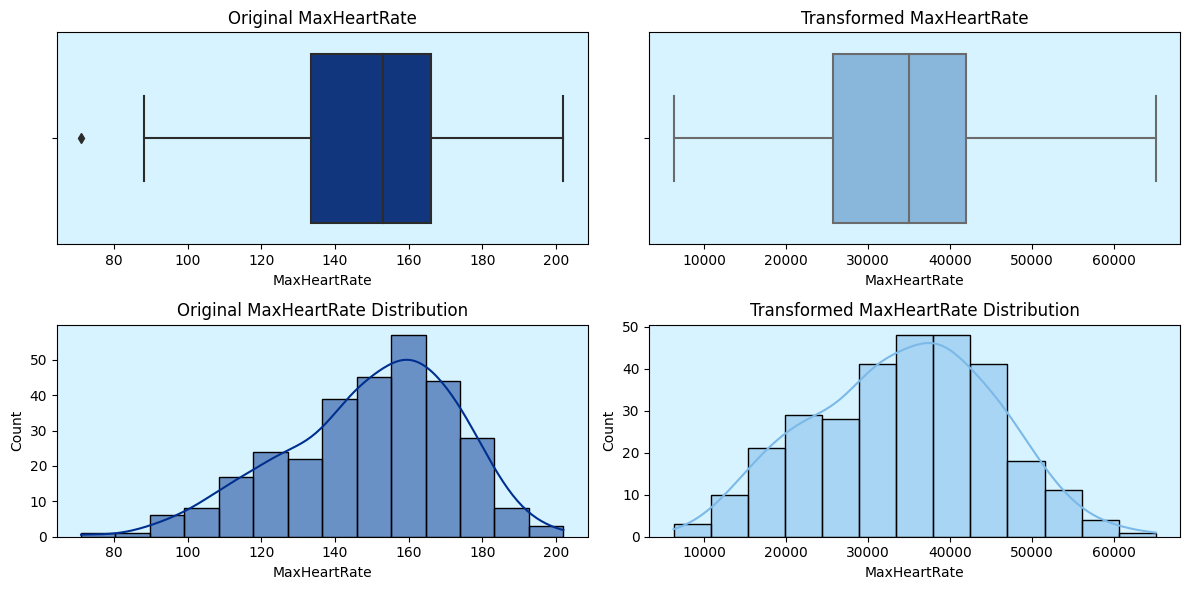

In [59]:
plot_transform(df, transformed_df, 'MaxHeartRate')

In [60]:
skewness_dist(df_eda, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.537
The distribution is left-skewed.


In [61]:
skewness_dist(transformed_df, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.075
The distribution is left-skewed.


<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">
        The skewness of the variable <b>MaxHeartRate</b> decreased from <b>-0.537</b> to <b>-0.075</b>.
    </p>
</div>

In [62]:
outliers_df["Variable"][3], outliers_df["Outliers"][3]

('MaxHeartRate', 1)

In [63]:
ecg_outliers_bc, ecg_lower_bound_bc, ecg_upper_bound_bc = find_outliers(transformed_df['MaxHeartRate'])

print("Lower Bound:", ecg_lower_bound_bc)
print("Upper Bound:", ecg_upper_bound_bc)
print("Outliers':", len(ecg_outliers_bc))

Lower Bound: 1449.5813416479687
Upper Bound: 66261.20163216196
Outliers': 0


<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">
        There was just an outlier <b>MaxHeartRate</b> variable and after applying Box-Cox transformation, it decreased to 0.
    </p>
</div>

<div style="background-color:#5D76A9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff; text-align: center;">
    <b><span style='color:#45b1e8; font-size:18px;'>📊 </span><span style='color:#F0F8FF;font-size:18px;'><b>Resting Blood Pressure</b> variable 📊</span></b>
</div>


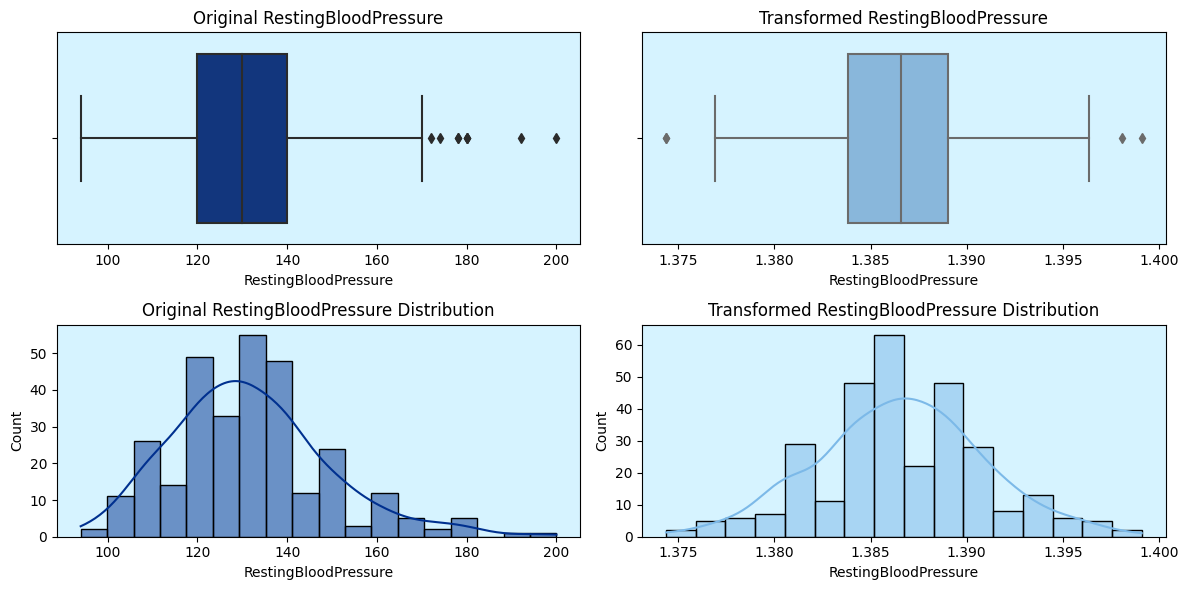

In [64]:
plot_transform(df, transformed_df, 'RestingBloodPressure')

In [65]:
skewness_dist(df_eda, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.714
The distribution is right-skewed.


In [66]:
skewness_dist(transformed_df, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: -0.001
The distribution is left-skewed.


<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">
        The skewness of the variable <b>RestingBloodPressure</b> decreased from <b>0.714</b> to <b>-0.001</b>.
    </p>
</div>

In [67]:
outliers_df["Variable"][1], outliers_df["Outliers"][1]

('RestingBloodPressure', 9)

In [68]:
rbp_outliers_bc, rbp_lower_bound_bc, rbp_upper_bound_bc = find_outliers(transformed_df['RestingBloodPressure'])

print("Lower Bound:", rbp_lower_bound_bc)
print("Upper Bound:", rbp_upper_bound_bc)
print("Outliers:", len(rbp_outliers_bc))

Lower Bound: 1.3760249306944374
Upper Bound: 1.3968131245105593
Outliers: 4


<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">
        There were 9 an outliers in <b>RestingBloodPressure</b> variable and after applying Box-Cox transformation, it decreased to 4.
    </p>
</div>

<div style="background-color:#5D76A9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff; text-align: center;">
    <b><span style='color:#45b1e8; font-size:18px;'>📊 </span><span style='color:#F0F8FF;font-size:18px;'><b>Cholesterol</b> variable 📊</span></b>
</div>


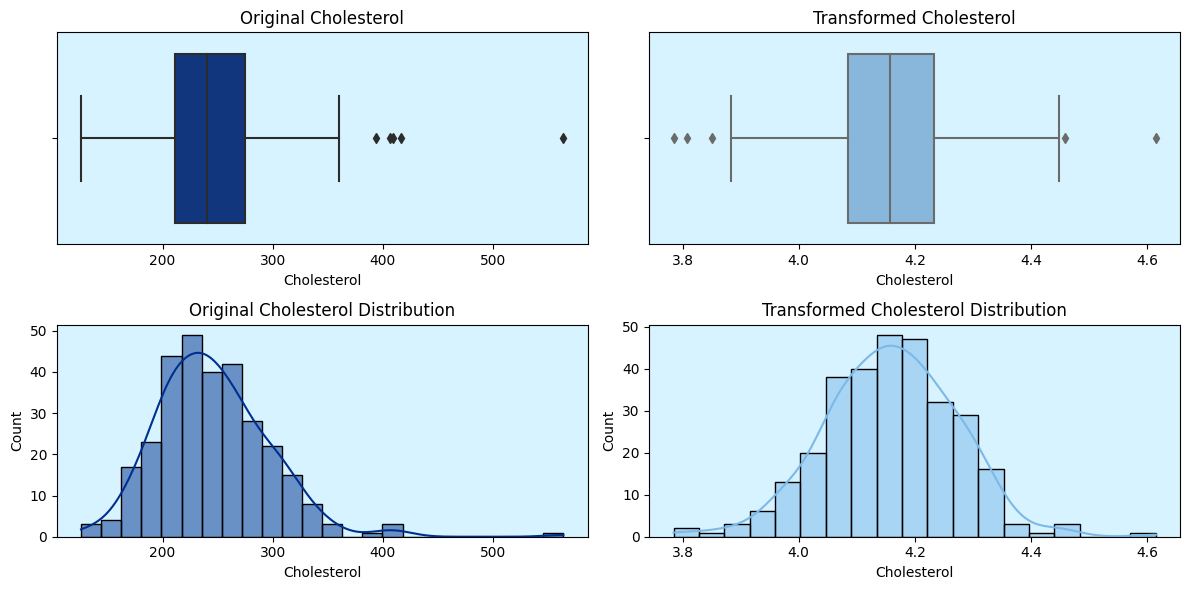

In [69]:
plot_transform(df, transformed_df, 'Cholesterol')

In [70]:
transformed_df = box_cox_transform(df)

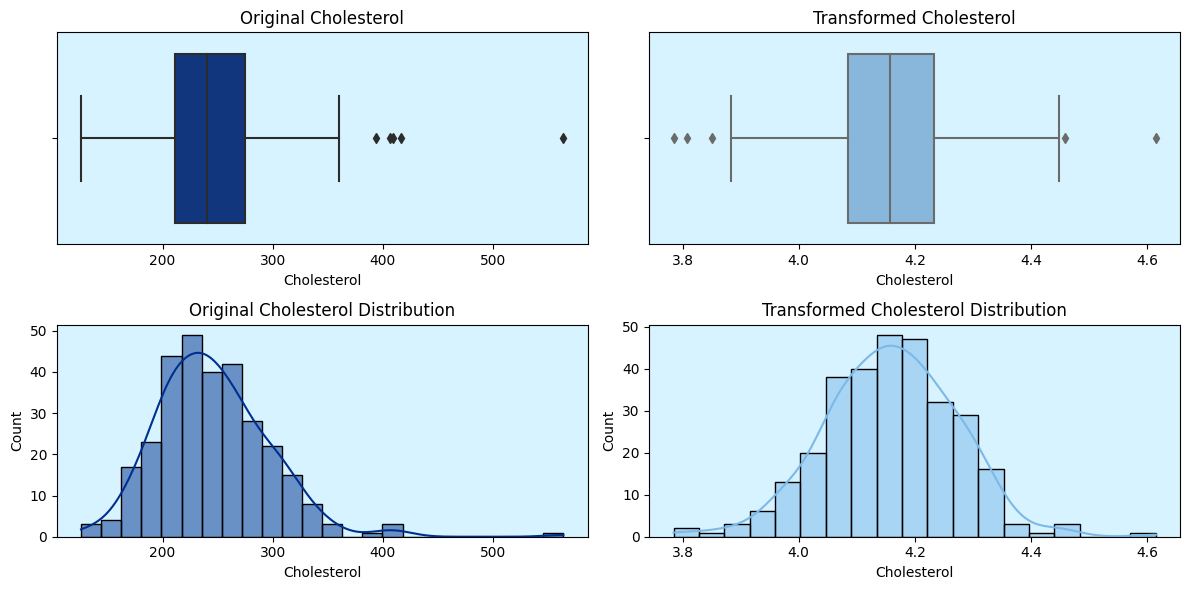

In [71]:
plot_transform(df, transformed_df, 'Cholesterol')

In [72]:
skewness_dist(df_eda, "Cholesterol")

Skewness of the Cholesterol variable: 1.143
The distribution is right-skewed.


In [73]:
skewness_dist(transformed_df, "Cholesterol")

Skewness of the Cholesterol variable: -0.006
The distribution is left-skewed.


<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">
        The skewness of the variable <b>Cholesterol</b> decreased from <b>1.143</b> to <b>-0.006</b>.
    </p>
</div>

In [74]:
outliers_df["Variable"][2], outliers_df["Outliers"][2]

('Cholesterol', 5)

In [75]:
ch_outliers_bc, ch_lower_bound_bc, ch_upper_bound_bc = find_outliers(transformed_df['Cholesterol'])

print("Lower Bound:", ch_lower_bound_bc)
print("Upper Bound:", ch_upper_bound_bc)
print("Outliers:", len(ch_outliers_bc))

Lower Bound: 3.864332295042104
Upper Bound: 4.453078106789231
Outliers: 5


<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">
        The number of outliers in <b>Cholerterol</b> variable was 5 and after applying Box-Cox transformation, there are stll 5 outliers but the skewness decreased.
    </p>
</div>

<div style="background-color:#5D76A9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff; text-align: center;">
    <b><span style='color:#45b1e8; font-size:18px;'>📊 </span><span style='color:#F0F8FF;font-size:18px;'><b>Old Peak</b> variable 📊</span></b>
</div>


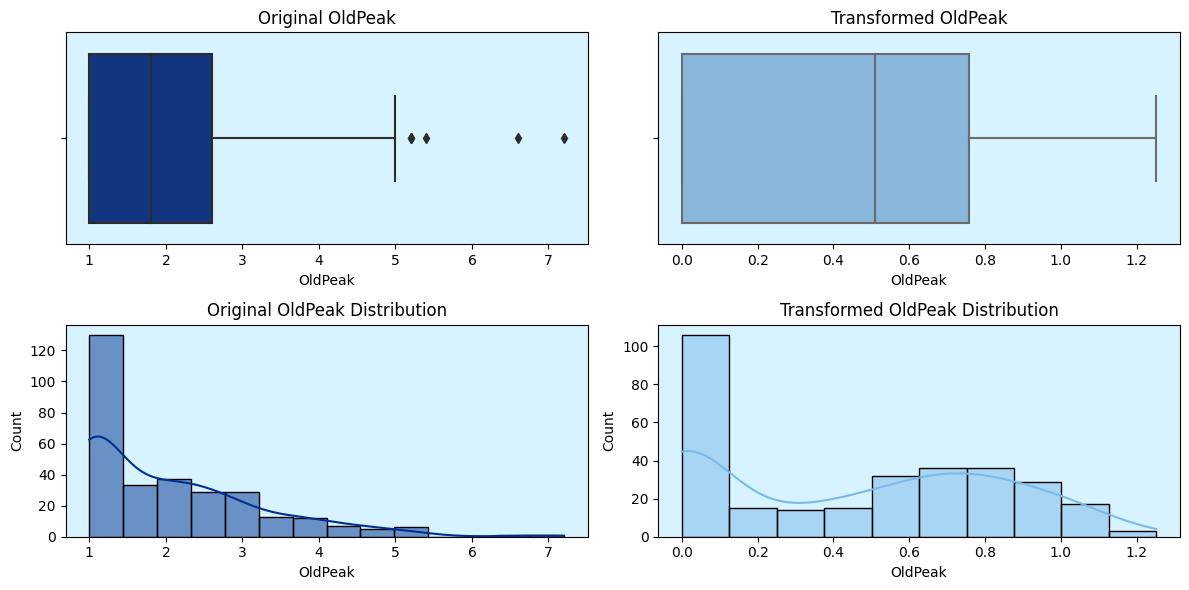

In [76]:
plot_transform(df, transformed_df, 'OldPeak')

In [77]:
skewness_dist(df_eda, "OldPeak")

Skewness of the OldPeak variable: 1.270
The distribution is right-skewed.


In [78]:
skewness_dist(transformed_df, "OldPeak")

Skewness of the OldPeak variable: 0.124
The distribution is right-skewed.


<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">
        The skewness of the variable <b>OldPeak</b> decreased from <b>1.270</b> to <b>0.124</b>.
    </p>
</div>

In [79]:
outliers_df["Variable"][4], outliers_df["Outliers"][4]

('OldPeak', 5)

In [80]:
op_outliers_bc, op_lower_bound_bc, op_upper_bound_bc = find_outliers(transformed_df['OldPeak'])

print("Lower Bound:", op_lower_bound_bc)
print("Upper Bound:", op_upper_bound_bc)
print("Outliers':", len(op_outliers_bc))

Lower Bound: -1.1382439503934751
Upper Bound: 1.897073250655792
Outliers': 0


In [81]:
transformed = transformed_df.copy()

In [82]:
df_copy = df.copy()

<div style="background-color:#4169e1; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:18px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; color:white;">
        The number of outliers in <b>OldPeak</b> variable was 5 and after applying Box-Cox transformation, it decreased to 0.
    </p>
</div>

<a id="missing"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 5.2 |</span><span style='color:#6495ed;font-size:20px;'> Missing Values 🫀</span></b>

⬆️ [Table of Contents](#contents_table)

In [83]:
df.isnull().sum()

Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">
    There are no <b>missing values</b> in this dataset.
    </p>
</div>


<a id="duplicated"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 5.3 |</span><span style='color:#6495ed;font-size:20px;'> Duplicated Values</span></b>

⬆️ [Table of Contents](#contents_table)

In [84]:
duplicated_rows = df.duplicated()
df[duplicated_rows]

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
164,38,Male,Non-anginal pain,138,175,False,Abnormality,173,No,1.0,Downsloping,4,Reversible defect,Heart Disease


<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">
    There is a sample in <b>index (164)</b> that is duplicated and must be removed from dataset.
    </p>
</div>


In [85]:
df.drop(index=164, axis=0, inplace=True)

In [86]:
transformed.drop(index=164, axis=0, inplace=True)

<a id="feature_engineering"></a>
<div class="hover-effect" id="setup">
        <p class="text"><b>👨🏻‍⚕️ Step 6 | Feature Engineering</b></p>
        <div class="overlay"></div>
</div>

⬆️ [Table of Contents](#contents_table)

<a id="onehot_encoding"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 6.1 |</span><span style='color:#6495ed;font-size:20px;'> One-Hot Encoding 🫀</span></b>

⬆️ [Table of Contents](#contents_table)

In [87]:
features_to_encode = ["ChestPain", "RestingECG", "STSlope", "Thalium"]

In [88]:
df = pd.get_dummies(df, columns=features_to_encode)

In [89]:
transformed = pd.get_dummies(transformed, columns=features_to_encode)

In [90]:
bool_columns = transformed.select_dtypes(include=bool).columns
transformed[bool_columns] = transformed[bool_columns].astype("int64")

In [91]:
bool_columns2 = df.select_dtypes(include=bool).columns
df[bool_columns2] = df[bool_columns2].astype("int64")

<a id="label_encoding"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 6.2 |</span><span style='color:#6495ed;font-size:20px;'> Label Encoding 🫀</span></b>

⬆️ [Table of Contents](#contents_table)

In [92]:
label_encoder = LabelEncoder()

In [93]:
features_to_encode = ['Sex', 'FastingBloodSugar', 'ExcerciseAngina', 'Status']

In [94]:
for feature in features_to_encode:
    transformed[feature] = label_encoder.fit_transform(transformed[feature])

In [95]:
for feature in features_to_encode:
    df[feature] = label_encoder.fit_transform(df[feature])

In [96]:
transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         302 non-null    float64
 1   Sex                         302 non-null    int64  
 2   RestingBloodPressure        302 non-null    float64
 3   Cholesterol                 302 non-null    float64
 4   FastingBloodSugar           302 non-null    int64  
 5   MaxHeartRate                302 non-null    float64
 6   ExcerciseAngina             302 non-null    int64  
 7   OldPeak                     302 non-null    float64
 8   nMajorVessels               302 non-null    int64  
 9   Status                      302 non-null    int64  
 10  ChestPain_Asymptomatic      302 non-null    int64  
 11  ChestPain_Atypical angina   302 non-null    int64  
 12  ChestPain_Non-anginal pain  302 non-null    int64  
 13  ChestPain_Typical angina    302 non-null

<a id="corr"></a>
<div class="hover-effect" id="setup">
        <p class="text"><b>👨🏻‍⚕️ Step 7 | Correlation Analysis</b></p>
        <div class="overlay"></div>
</div>

⬆️ [Table of Contents](#contents_table)

In [97]:
df_corr = df.copy()

In [98]:
df2 = df.copy()

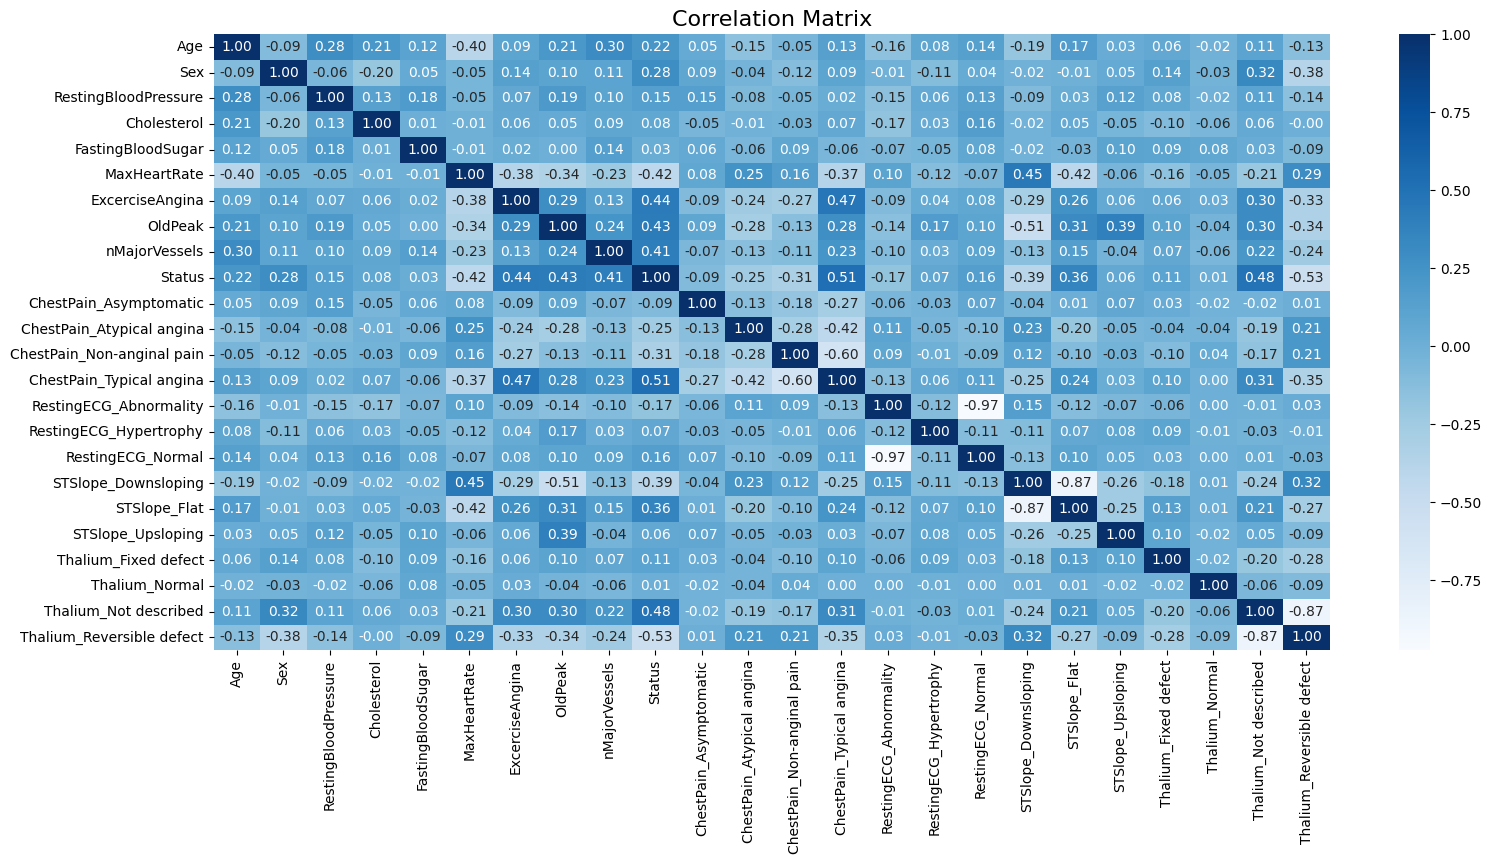

In [99]:
df_correlation = df_corr.corr()

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">
    After one-hot encoding, each encoded categorical feature introduces an additional column. Before dropping these columns, it's beneficial to analyze their correlation with the target variable. By identifying the columns with the weakest correlation, we can decide which ones to drop. Here are the encoded columns that exhibit this scenario:
    </p>
</div>


In [100]:
df2.drop(["ChestPain_Asymptomatic", "RestingECG_Hypertrophy", "STSlope_Upsloping", "Thalium_Normal"], axis=1, inplace=True)

In [101]:
transformed.drop(["ChestPain_Asymptomatic", "RestingECG_Hypertrophy", "STSlope_Upsloping", "Thalium_Normal"], axis=1, inplace=True)

In [102]:
df3_no_transformed = df2.copy()

In [103]:
df3 = transformed.copy()

<a id="scaling"></a>
<div class="hover-effect" id="setup">
        <p class="text"><b>👨🏻‍⚕️ Step 8 | Feature Scaling</b></p>
        <div class="overlay"></div>
</div>

⬆️ [Table of Contents](#contents_table)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">
    As we have outliers in numerical features, so I decided to use StandardScaler to apply standardization on numerical features:
    </p>
</div>

In [104]:
features_to_scale = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak', 'nMajorVessels']

scaler = StandardScaler()

scaler.fit(transformed[features_to_scale])

transformed_scaled = scaler.transform(transformed[features_to_scale])
transformed[features_to_scale] = transformed_scaled

In [105]:
transformed[features_to_scale] = scaler.fit_transform(transformed[features_to_scale])

In [106]:
df2[features_to_scale] = scaler.fit_transform(df[features_to_scale])

<a id="modeling"></a>
<div class="hover-effect" id="setup">
        <p class="text"><b>👨🏻‍⚕️ Step 9 | Modeling</b></p>
        <div class="overlay"></div>
</div>

⬆️ [Table of Contents](#contents_table) 

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">
    I defined a function that customize the way of splitting dataset into train and test:
    </p>
</div>


In [107]:
def customize_split(df):
    df_shuffled = df.sample(frac=1, random_state=42)

    train_size = 0.7
    test_size = 0.3

    num_samples = len(df_shuffled)
    num_samples_train = int(num_samples * train_size)
    num_samples_test = num_samples - num_samples_train

    train_df = df_shuffled.head(num_samples_train)

    num_samples_per_class_test = int(num_samples_test / 2)
    test_df = pd.concat([df_shuffled[df_shuffled['Status'] == 0].tail(num_samples_per_class_test),
                         df_shuffled[df_shuffled['Status'] == 1].tail(num_samples_per_class_test)])

    X_train = train_df.drop(columns=['Status'])
    y_train = train_df['Status'].values 

    X_test = test_df.drop(columns=['Status'])
    y_test = test_df['Status'].values

    print(test_df['Status'].value_counts())

    percent_train = (len(train_df) / len(df_shuffled)) * 100
    percent_test = (len(test_df) / len(df_shuffled)) * 100
    
    return X_train, X_test, y_train, y_test, percent_train, percent_test

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">
    Let's balance the number of each classes(0, 1) in target variable:
    </p>
</div>

In [108]:
df2_X_train, df2_X_test, df2_y_train, df2_y_test, ptrain_df2, ptest_df2 = customize_split(df2)
transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, ptrain_df2, ptest_df2 = customize_split(transformed)

Status
0    45
1    45
Name: count, dtype: int64
Status
0    45
1    45
Name: count, dtype: int64


<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">
    <em style="color:blue;">Now, we have 45 samples(balanced) for each classes in target variable.</em>
    </p>
</div>

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">
    For both df2 and transformed we have:
    </p>
</div>

In [109]:
print(f"Percentage of samples for training: {ptrain_df2:.2f}%")
print(f"Percentage of samples for testing: {ptest_df2:.2f}%")

Percentage of samples for training: 69.87%
Percentage of samples for testing: 29.80%


In [110]:
print(len(df2_X_train), len(df2_X_test), len(df2_y_train), len(df2_y_test))

211 90 211 90


In [111]:
(pd.DataFrame(df2_y_train)).value_counts()

0
0    114
1     97
Name: count, dtype: int64

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">
    Dataframe <b>df3</b> created to train Decision Tress and Random Forest Models
    </p>
</div>

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px; color:blue;">
Transformed data (no scaling)
    </p>
</div>

In [112]:
df3_X_train, df3_X_test, df3_y_train, df3_y_test, ptrain_df3, ptest_df3 = customize_split(df3) 

Status
0    45
1    45
Name: count, dtype: int64


<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;color:blue;">
No transformation and no scaling:
    </p>
</div>

In [113]:
df3_tr_X_train, df3_tr_X_test, df3_tr_y_train, df3_tr_y_test, ptrain_df3_tr, ptest_df3_tr = customize_split(df3_no_transformed)

Status
0    45
1    45
Name: count, dtype: int64


<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">
    <b>211 samples (70% of data)</b> for training  and <b> 90 samples (30% of data)</b>  for validation (test).
    </p>
</div>


<a id="knn"></a>
<div style="background-color:#5D76A9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff; text-align: center;">
    <b><span style='color:#45b1e8; font-size:18px;'>📊 9.1 | </span><span style='color:#F0F8FF;font-size:18px;'><b>K-Nearest Neighbors (KNN)</b> 📊</span></b>
</div>


⬆️ [Table of Contents](#contents_table)

<a id="knn-hpt"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 9.1.1 |</span><span style='color:#6495ed;font-size:20px;'> Build KNN & Hyper-Parameter Tuning🫀</span></b>

⬆️ [Table of Contents](#contents_table)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 30px;">
To improve the accuracy of a KNN model, first adjust its hyperparameters after building it. This ensures that the results from training and testing are consistent. Identify which settings to adjust, such as the number of neighbors (n_neighbors) and "p". Understanding "p" is crucial; it determines the method of measuring distance, with 1 representing Manhattan distance and 2 representing Euclidean distance.
    </p>
</div>


In [114]:
def tuning(train_accuracies, test_accuracies, error, k, X_train, X_test, y_train, y_test, p):
    best_conf_matrices = []
    
    for n in np.arange(2, 18):
        knn_classifier = KNeighborsClassifier(n_neighbors=n, p=p)
        
        knn_classifier.fit(X_train, y_train)
        train_accuracy = knn_classifier.score(X_train, y_train)
        test_accuracy = knn_classifier.score(X_test, y_test)
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        error.append(train_accuracy - test_accuracy)
        k.append(n)
        
        y_pred = knn_classifier.predict(X_test)
        conf_matrix = confusion_matrix(y_test, y_pred)
        best_conf_matrices.append(conf_matrix)
                
    return train_accuracies, test_accuracies, error, k, best_conf_matrices

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:10px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 30px;">
    After using the tuning function, we get new train and test accuracies for our KNN model. We also find out the number of neighbors (k) and the difference between the train and test accuracies. Then, we pick the "k" value that gives us good accuracy and the smallest difference between the train and test accuracies (error).     
    </p>
</div>


In [115]:
train_accuracies_p1, test_accuracies_p1, error_p1, k_p1 = [], [], [], []
train_accuracies_p2, test_accuracies_p2, error_p2, k_p2 = [], [], [], []

In [116]:
train_accuracies_p1, test_accuracies_p1, error_p1, k_p1, conf_matrices_p1 = tuning(train_accuracies_p1, test_accuracies_p1, error_p1, k_p1, df2_X_train, df2_X_test, df2_y_train, df2_y_test, p=1)
train_accuracies_p2, test_accuracies_p2, error_p2, k_p2, conf_matrices_p2 = tuning(train_accuracies_p2, test_accuracies_p2, error_p2, k_p2, df2_X_train, df2_X_test, df2_y_train, df2_y_test, p=2)

In [117]:
train_accuracies_p1_transform, test_accuracies_p1_transform, error_p1_transform, k_p1_transform = [], [], [], []
train_accuracies_p2_transform, test_accuracies_p2_transform, error_p2_transform, k_p2_transform = [], [], [], []

In [118]:
train_accuracies_p1_transform, test_accuracies_p1_transform, error_p1_transform, k_p1_transform, conf_matrices_p1_transform = tuning(train_accuracies_p1_transform, test_accuracies_p1_transform, error_p1_transform, k_p1_transform, transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, p=1)
train_accuracies_p2_transform, test_accuracies_p2_transform, error_p2_transform, k_p2_transform, conf_matrices_p2_transform = tuning(train_accuracies_p2_transform, test_accuracies_p2_transform, error_p2_transform, k_p2_transform, transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, p=2)

In [119]:
def plot_knn_evaluation(train_accuracies, test_accuracies, k, df_name, p):
    """
    This function is defined to plot the results of train and test accuracies,
    as well as the error for each number of neighbors visually.
    Additionally, I compared the results of KNN models with different values of "p"
    to gain a better understanding of the differences between the results visually.
    """
    
    plt.figure(figsize=(12, 4))    
    plt.plot(k, train_accuracies, label='Training Accuracy', marker='o', color="red")
    plt.plot(k, test_accuracies, label='Test Accuracy', marker='x', color='blue')
    plt.title(f'KNN Accuracy, p={p}, {df_name}')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.xticks(k)
    plt.tight_layout()

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 16px;">
    See the results of differen k and p=1 on <b>original</b> data (df2):
    </p>
</div>


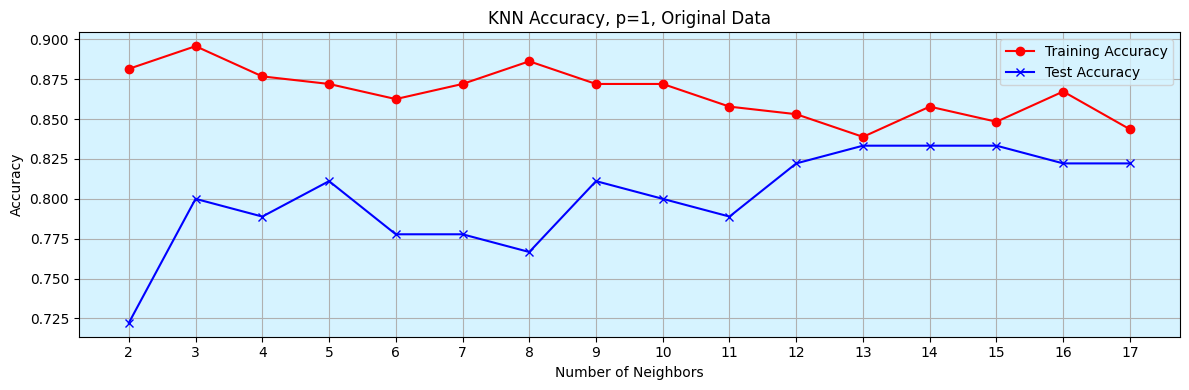

In [120]:
plot_knn_evaluation(train_accuracies_p1, test_accuracies_p1, k_p1, "Original Data", p=1)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 16px;">
    See the results of differen k and p=2 on <b>original</b> data (df2):
    </p>
</div>


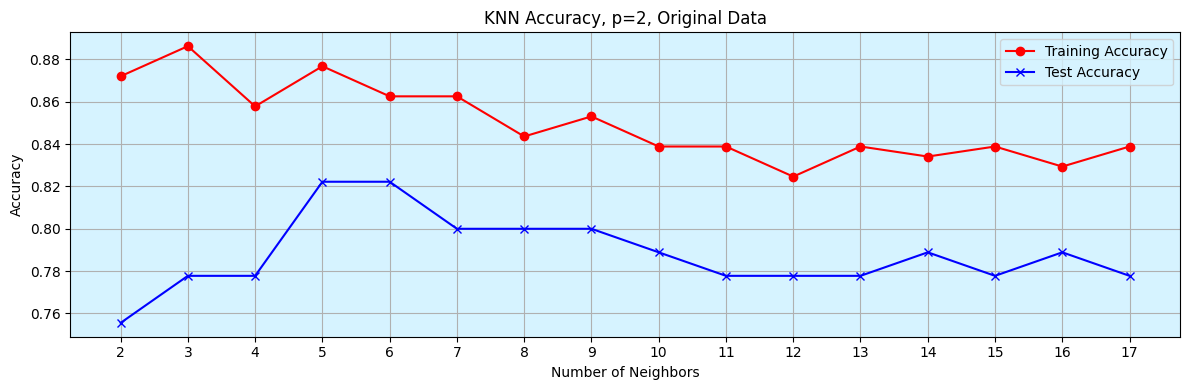

In [121]:
plot_knn_evaluation(train_accuracies_p2, test_accuracies_p2, k_p2,"Original Data", p=2)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 16px;">
    See the results of differen k and p=1 on <b>transformed</b> data (df2):
    </p>
</div>


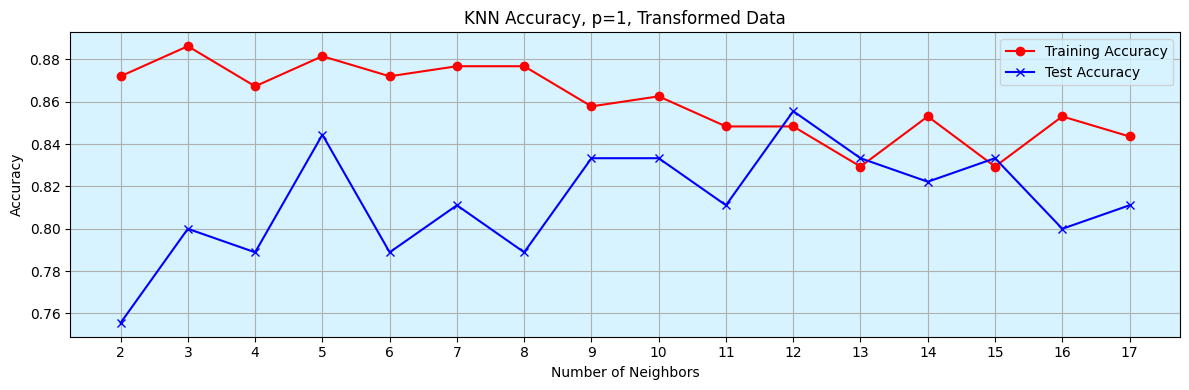

In [122]:
plot_knn_evaluation(train_accuracies_p1_transform, test_accuracies_p1_transform, k_p1_transform, "Transformed Data", p=1)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 16px;">
    See the results of differen k and p=2 on <b>transformed</b> data (df2):
    </p>
</div>


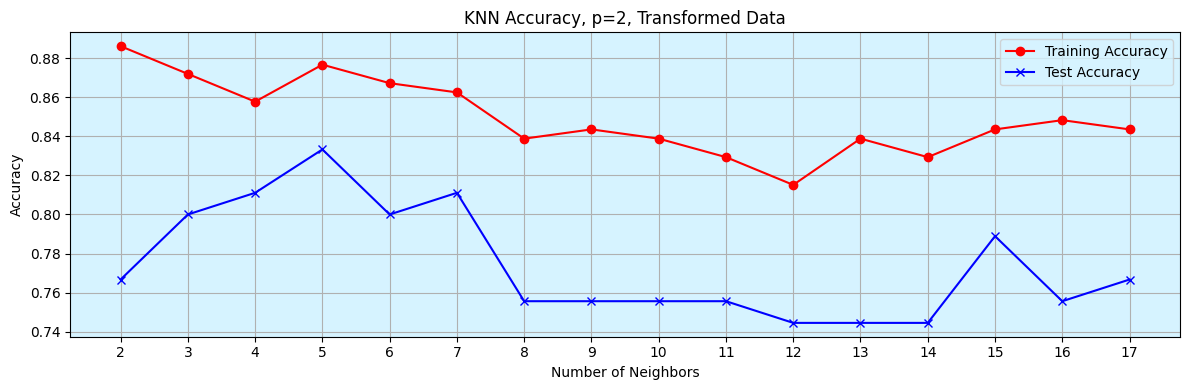

In [123]:
plot_knn_evaluation(train_accuracies_p2_transform, test_accuracies_p2_transform, k_p2_transform, "Transformed Data", p=2)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">
    <ul>
    <li style="font-size:16px; line-height: 1.5em;">As we can see above, we have better results in most cases for accuracies of KNN model using transformed data (Box-Cox method used) in comparison with original data (df2)</li>
    </ul>
    </p>
</div>


<a id="knn-evaluation"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 9.1.2 |</span><span style='color:#6495ed;font-size:20px;'> KNN Model Evaluation🫀</span></b>

⬆️ [Table of Contents](#contents_table)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">
I decided to choose k=5 and p=1 as an acceptable result. So, let's build KNN model with these parameters on transformed data using Box-Cox method and see the evaluations using confusion matrix and classification report:
    </p>
</div>


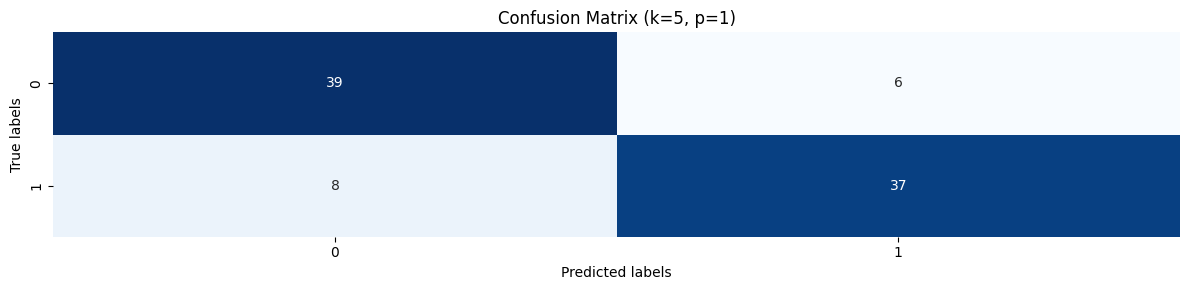

In [124]:
fig, ax = plt.subplots(figsize=(12, 3))

knn_manual = KNeighborsClassifier(n_neighbors=5, p=1)
knn_manual.fit(transformed_X_train, transformed_y_train)

y_pred_transformed = knn_manual.predict(transformed_X_test)

cm_transformed = confusion_matrix(transformed_y_test, y_pred_transformed)

sns.heatmap(cm_transformed, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
ax.set_title('Confusion Matrix (k=5, p=1)')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

plt.tight_layout()
plt.show()

In [125]:
y_pred_transformed_5_train = knn_manual.predict(transformed_X_train)
y_pred_transformed_5_test = knn_manual.predict(transformed_X_test)

print("Classification Report - Train Data:")
print(classification_report(transformed_y_train, y_pred_transformed_5_train))

print("Classification Report - Test Data:")
print(classification_report(transformed_y_test, y_pred_transformed_5_test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       114
           1       0.90      0.84      0.87        97

    accuracy                           0.88       211
   macro avg       0.88      0.88      0.88       211
weighted avg       0.88      0.88      0.88       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        45
           1       0.86      0.82      0.84        45

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



<a id="svm"></a>
<div style="background-color:#5D76A9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff; text-align: center;">
    <b><span style='color:#45b1e8; font-size:18px;'>📊 9.2 | </span><span style='color:#F0F8FF;font-size:18px;'><b>Support Vector Machine (SVM)</b> 📊</span></b>
</div>


⬆️ [Table of Contents](#contents_table)

<a id="svm-hpt"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 9.2.1 |</span><span style='color:#6495ed;font-size:20px;'> Build SVM &  Hyper-Parameter Tuning🫀</span></b>

⬆️ [Table of Contents](#contents_table)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">In this analysis, I'm trying to figure out which settings for the <b>kernel</b> and <b>C</b> parameters will give me the best results. <b>SVM</b> models are sensitive to <b>outliers</b>, so I've adjusted for this by transforming the data using a <b>box-cox transformation</b>. Here, I'll show you the outcomes and compare how the model performs with both the original and transformed data. This comparison will help us determine which combination of parameters works best.</p>
</div>

In [126]:
def plot_svm_accuracy(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, df2_X_train, df2_X_test, df2_y_train, df2_y_test):
    """
    I defined this function to see the results of different values for C and also kernels visually
    and compare the results of original data and transformed data near each other 
    and pick the appropriate parameters to build our SVM model.
    """
    
    C_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    kernels = ['linear', 'poly', 'rbf', 'sigmoid'] 

    fig, axs = plt.subplots(4, 2, figsize=(16, 20))  # 4x2 subplots

    for i, kernel in enumerate(kernels):

        ax1 = axs[i, 0]
        train_scores1 = []
        test_scores1 = []
        for C in C_values:
            svm_clf = SVC(kernel=kernel, C=C)
            svm_clf.fit(df2_X_train, df2_y_train)
            train_scores1.append(svm_clf.score(df2_X_train, df2_y_train))
            test_scores1.append(svm_clf.score(df2_X_test, df2_y_test))
        ax1.plot(C_values, train_scores1, label='Training Accuracy', marker='o')
        ax1.plot(C_values, test_scores1, label='Testing Accuracy', marker='x')
        ax1.set_title(f'SVM with {kernel.capitalize()} Kernel - Original Data')
        ax1.set_xlabel('C')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
        ax1.grid(True)
        ax1.set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
        ax1.tick_params(axis='x', rotation=90)

        ax2 = axs[i, 1]
        train_scores2 = []
        test_scores2 = []
        for C in C_values:
            svm_clf = SVC(kernel=kernel, C=C)
            svm_clf.fit(transformed_X_train, transformed_y_train)
            train_scores2.append(svm_clf.score(transformed_X_train, transformed_y_train))
            test_scores2.append(svm_clf.score(transformed_X_test, transformed_y_test))
        ax2.plot(C_values, train_scores2, label='Training Accuracy', marker='o')
        ax2.plot(C_values, test_scores2, label='Testing Accuracy', marker='x')
        ax2.set_title(f'SVM with {kernel.capitalize()} Kernel - Data Transformed')
        ax2.set_xlabel('C')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True)
        ax2.set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
        ax2.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">Here's a comparison of the results obtained using different kernels and values for the C parameters:</p>
</div>

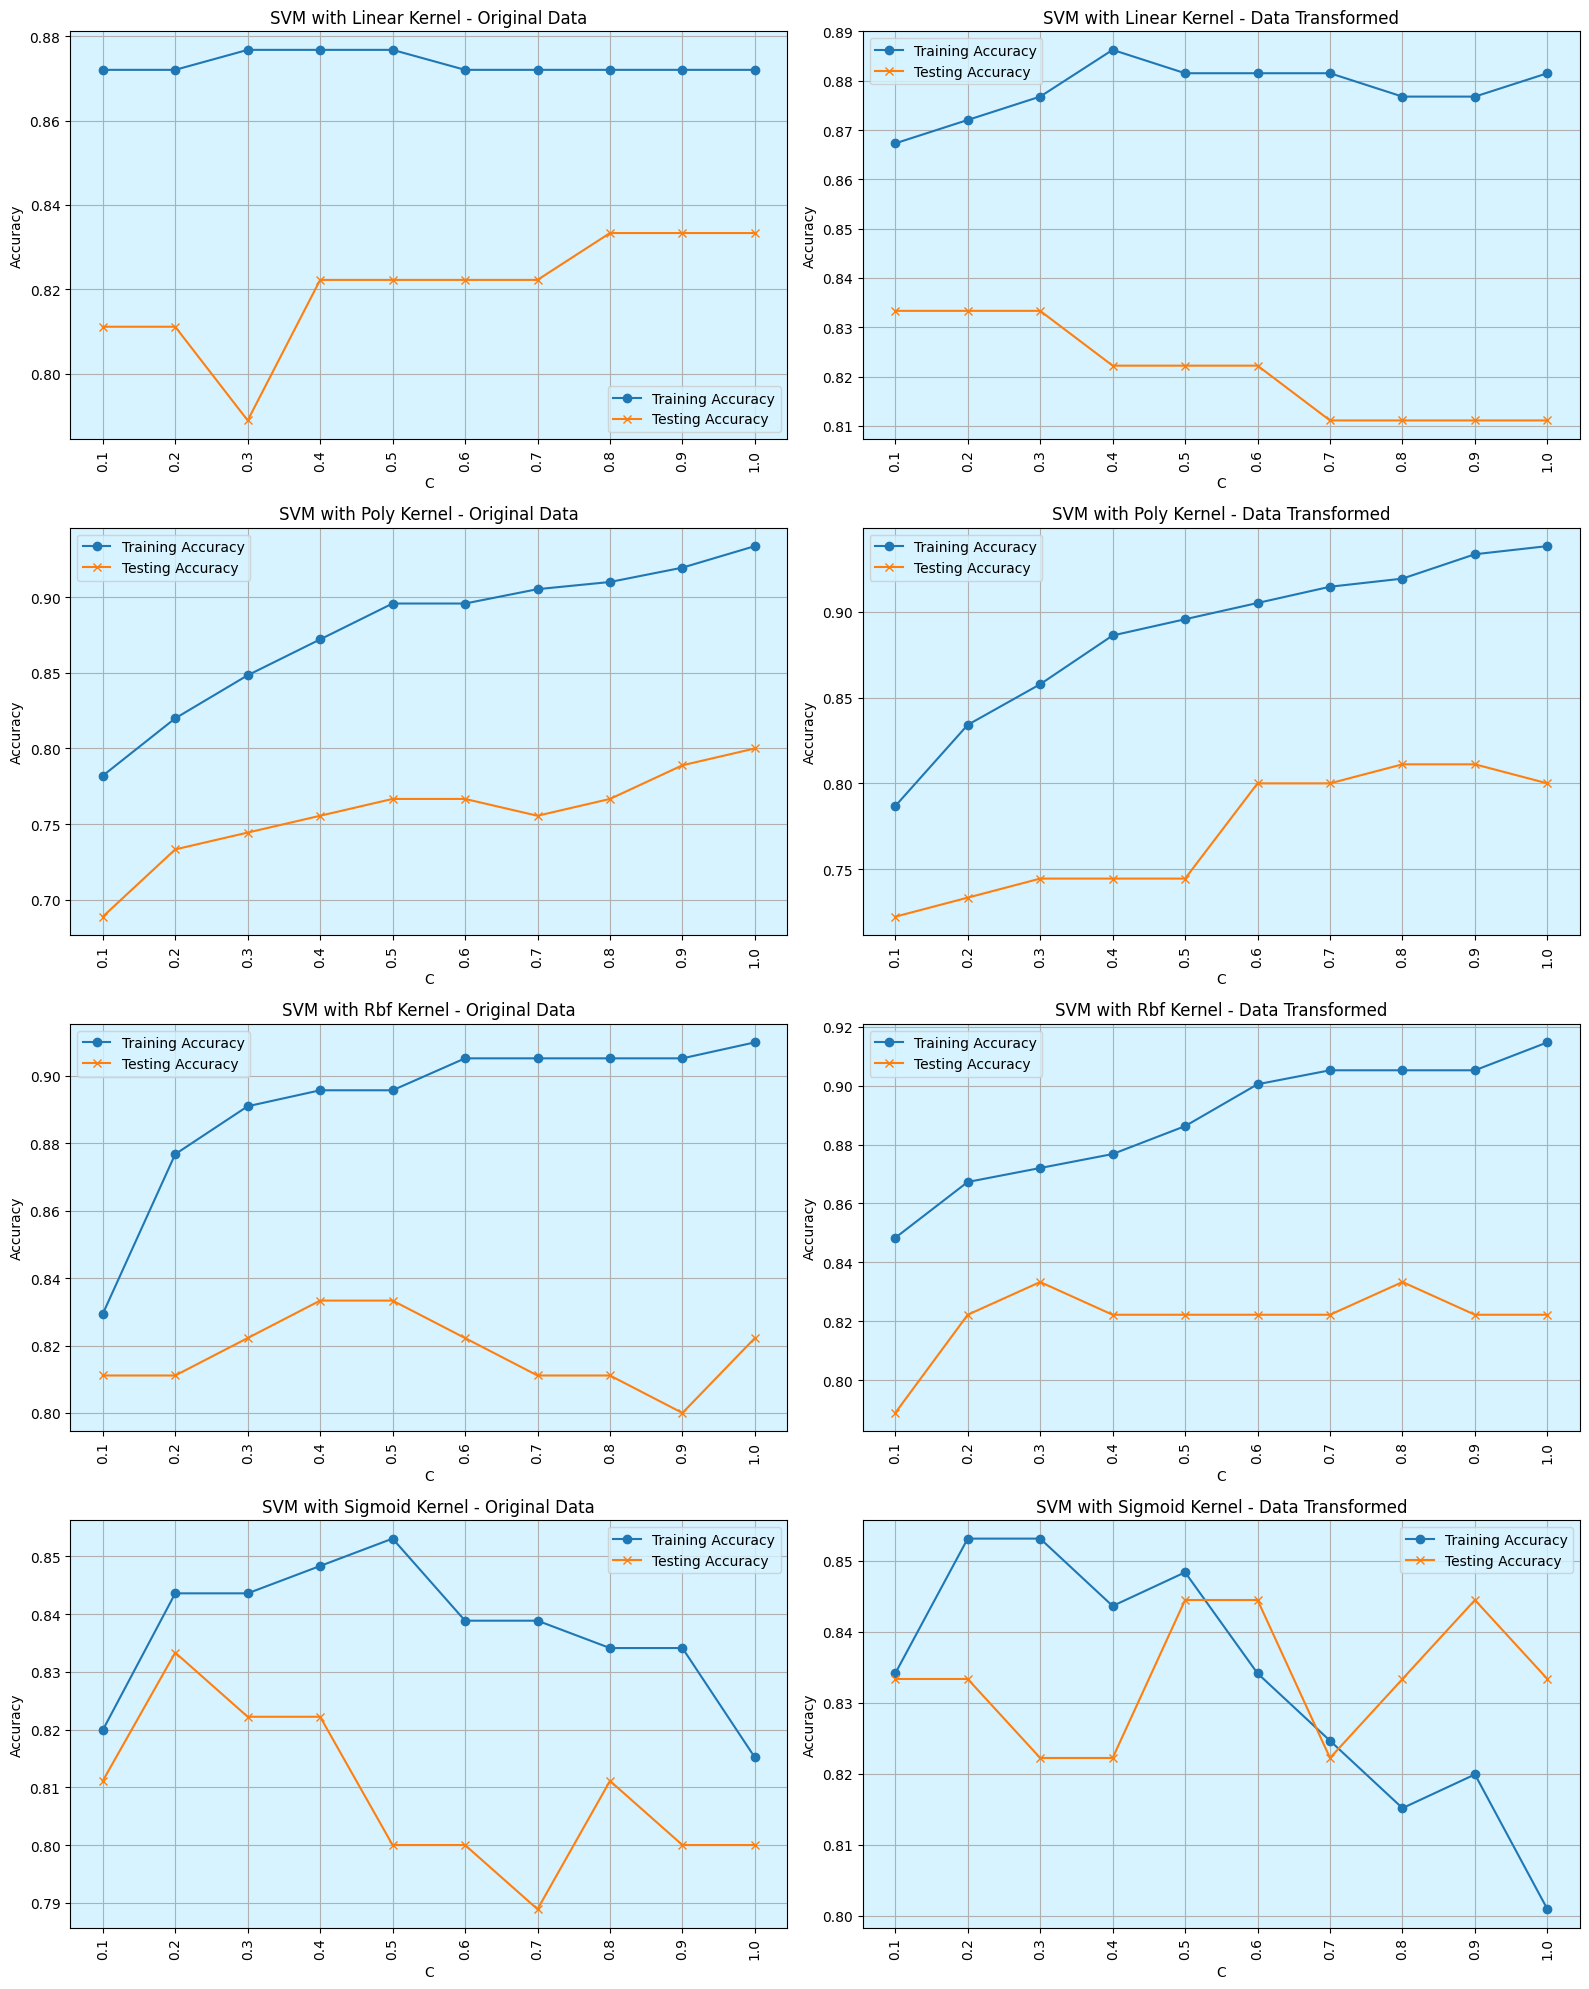

In [127]:
plot_svm_accuracy(transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, df2_X_train, df2_X_test, df2_y_train, df2_y_test)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">In some cases, the transformed data yielded better results, while in others, the original data performed better without any transformation. In the next section, I will explore different parameters that I believe may lead to better performance, and ultimately, I will select the most suitable approach.</p>
</div>

<a id="svm-evaluation"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 9.2.2 |</span><span style='color:#6495ed;font-size:20px;'> SVM Model Evaluation🫀</span></b>

⬆️ [Table of Contents](#contents_table)

In [128]:
def train_svm_model(X_train, y_train, kernel, C):
    """
    Trains a Support Vector Machine (SVM) model with different values of C and kernel.
    """
    
    svm_clf = SVC(kernel=kernel, C=C)
    svm_clf.fit(X_train, y_train)
    return svm_clf

def plot_confusion_matrices(y_trues, y_preds, titles):
    """
    Plot the evaluation results of confusion matrices for both training and test data near each other.
    """
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    for i, (y_true, y_pred, title) in enumerate(zip(y_trues, y_preds, titles)):
        conf_matrix = confusion_matrix(y_true, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[i])
        axs[i].set_title(title)
        axs[i].set_xlabel('Predicted Label')
        axs[i].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

def print_classification_report(y_true, y_pred, title):
    """
    See the results of classification report to have a better understading of evaluations for SVM models
    for different C and kernels.
    """
    
    print(f"Classification Report - {title}:")
    print(classification_report(y_true, y_pred))

<a id="categorical_bivariate"></a>
# <p style="background-color: #4169e1; padding: 1px; border-radius: 15px;color:white; font-size:22px; font-family:Calibri; text-align:center;line-height: 1.5em; border-radius:100px 20px;">📊 Linear Kernel 📊</p>

⬆️ [Tabel of Contents](#contents_table) 

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">Train SVM on <b>original</b> data with linear kernel and C=0.3:
    </p>
</div>

In [129]:
svm_model = train_svm_model(df2_X_train, df2_y_train, kernel='linear', C=0.3)

In [130]:
train_predictions_df2 = svm_model.predict(df2_X_train)
test_predictions_df2 = svm_model.predict(df2_X_test)

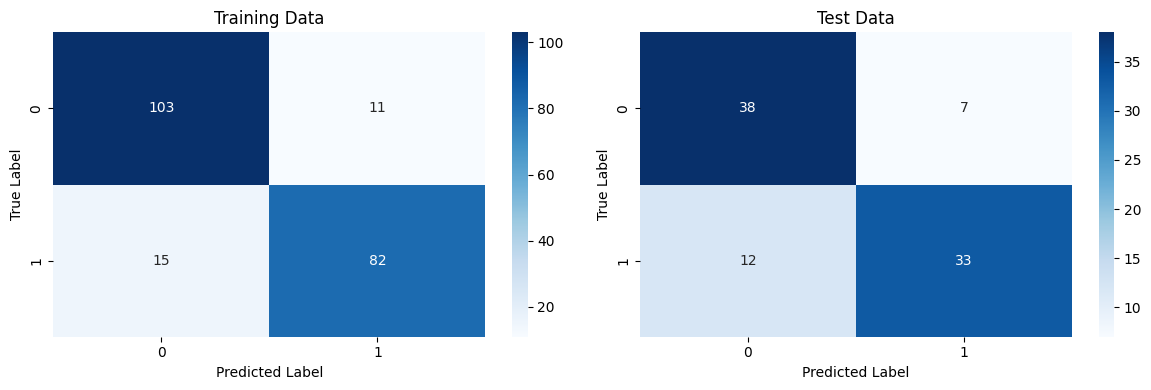

In [131]:
plot_confusion_matrices([df2_y_train, df2_y_test], [train_predictions_df2, test_predictions_df2], ['Training Data', 'Test Data'])

In [132]:
print_classification_report(df2_y_train, train_predictions_df2, title='Training Data')
print_classification_report(df2_y_test, test_predictions_df2, title='Test Data')

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       114
           1       0.88      0.85      0.86        97

    accuracy                           0.88       211
   macro avg       0.88      0.87      0.88       211
weighted avg       0.88      0.88      0.88       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        45
           1       0.82      0.73      0.78        45

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90



<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">Train SVM on <b>transformed</b> data with linear kernel and C=0.3:
    </p>
</div>

In [133]:
linear_svm_model = train_svm_model(transformed_X_train, transformed_y_train, kernel='linear', C=0.3)

In [134]:
train_predictions_transformed = linear_svm_model.predict(transformed_X_train)
test_predictions_transformed = linear_svm_model.predict(transformed_X_test)

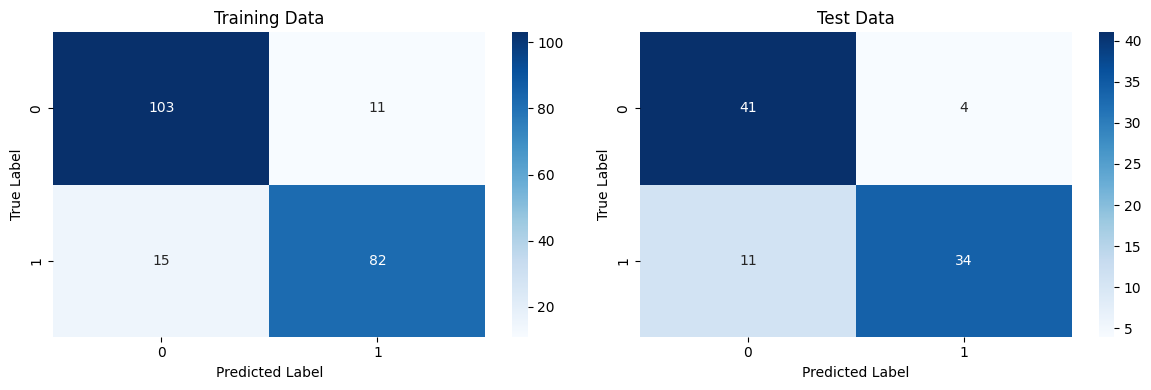

In [135]:
plot_confusion_matrices([transformed_y_train, transformed_y_test], [train_predictions_transformed, test_predictions_transformed], ['Training Data', 'Test Data'])

In [136]:
print_classification_report(transformed_y_train, train_predictions_transformed, title='Training Data')
print_classification_report(transformed_y_test, test_predictions_transformed, title='Test Data')

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       114
           1       0.88      0.85      0.86        97

    accuracy                           0.88       211
   macro avg       0.88      0.87      0.88       211
weighted avg       0.88      0.88      0.88       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        45
           1       0.89      0.76      0.82        45

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90



<a id="categorical_bivariate"></a>
# <p style="background-color: #4169e1; padding: 1px; border-radius: 15px;color:white; font-size:22px; font-family:Calibri; text-align:center;line-height: 1.5em; border-radius:100px 20px;">📊 Poly Kernel 📊</p>

⬆️ [Tabel of Contents](#contents_table) 

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">Train SVM on <b>original</b> data with poly kernel and C=0.7:
    </p>
</div>

In [137]:
poly_svm_model = train_svm_model(df2_X_train, df2_y_train, kernel='poly', C=0.7)

In [138]:
poly_train_predictions_df2 = poly_svm_model.predict(df2_X_train)
poly_test_predictions_df2 = poly_svm_model.predict(df2_X_test)

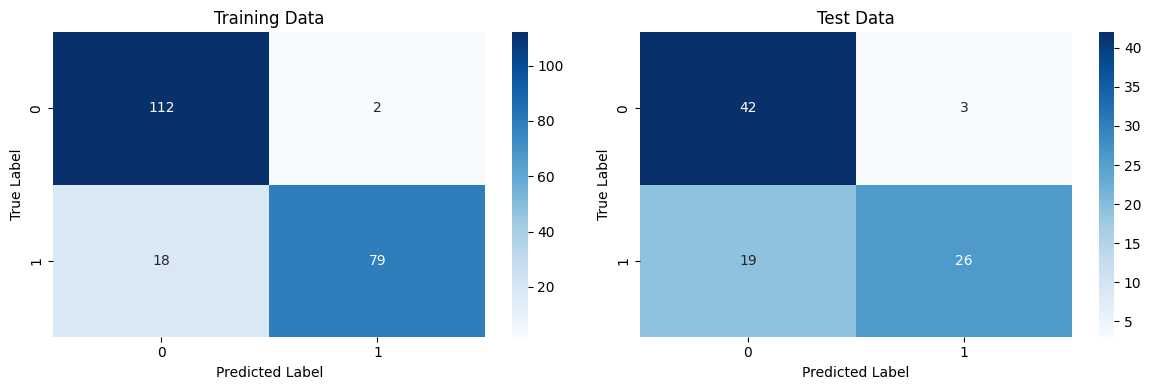

In [139]:
plot_confusion_matrices([df2_y_train, df2_y_test], [poly_train_predictions_df2, poly_test_predictions_df2], ['Training Data', 'Test Data'])

In [140]:
print_classification_report(df2_y_train, poly_train_predictions_df2, title='Training Data')
print_classification_report(df2_y_test, poly_test_predictions_df2, title='Test Data')

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       114
           1       0.98      0.81      0.89        97

    accuracy                           0.91       211
   macro avg       0.92      0.90      0.90       211
weighted avg       0.91      0.91      0.90       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        45
           1       0.90      0.58      0.70        45

    accuracy                           0.76        90
   macro avg       0.79      0.76      0.75        90
weighted avg       0.79      0.76      0.75        90



<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">Train SVM on <b>transformed</b> data with poly kernel and C=0.7:
    </p>
</div>

In [141]:
poly_svm_model_transformed = train_svm_model(transformed_X_train, transformed_y_train, kernel='poly', C=0.7)

In [142]:
poly_train_predictions_transformed = poly_svm_model_transformed.predict(transformed_X_train)
poly_test_predictions_transformed = poly_svm_model_transformed.predict(transformed_X_test)

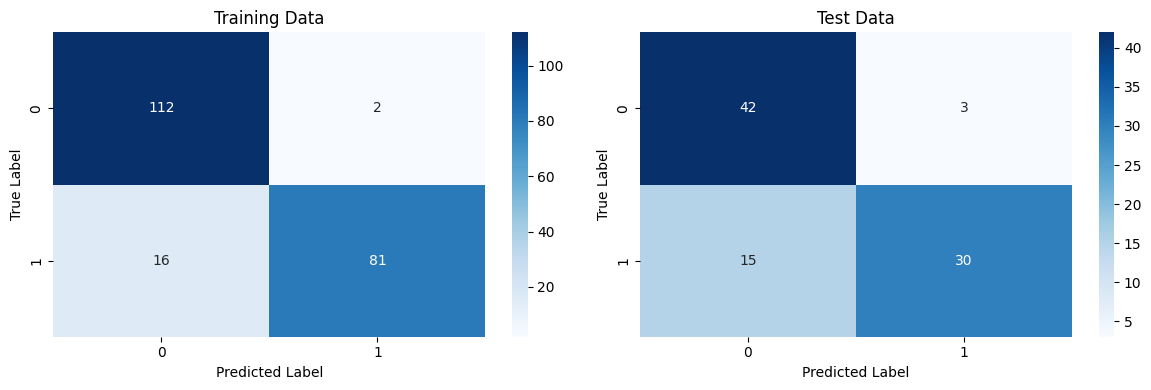

In [143]:
plot_confusion_matrices([transformed_y_train, transformed_y_test], [poly_train_predictions_transformed, poly_test_predictions_transformed], ['Training Data', 'Test Data'])

In [144]:
print_classification_report(transformed_y_train, poly_train_predictions_transformed, title='Training Data')
print_classification_report(transformed_y_test, poly_test_predictions_transformed, title='Test Data')

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       114
           1       0.98      0.84      0.90        97

    accuracy                           0.91       211
   macro avg       0.93      0.91      0.91       211
weighted avg       0.92      0.91      0.91       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        45
           1       0.91      0.67      0.77        45

    accuracy                           0.80        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.80      0.80        90



<a id="categorical_bivariate"></a>
# <p style="background-color: #4169e1; padding: 1px; border-radius: 15px;color:white; font-size:22px; font-family:Calibri; text-align:center;line-height: 1.5em; border-radius:100px 20px;">📊 RBF Kernel 📊</p>

⬆️ [Tabel of Contents](#contents_table) 

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">Train SVM on <b>original</b> data with RBF kernel and C=0.3:
    </p>
</div>

In [145]:
rbf_svm_model = train_svm_model(df2_X_train, df2_y_train, kernel='rbf', C=0.3)

In [146]:
rbf_train_predictions_df2 = rbf_svm_model.predict(df2_X_train)
rbf_test_predictions_df2 = rbf_svm_model.predict(df2_X_test)

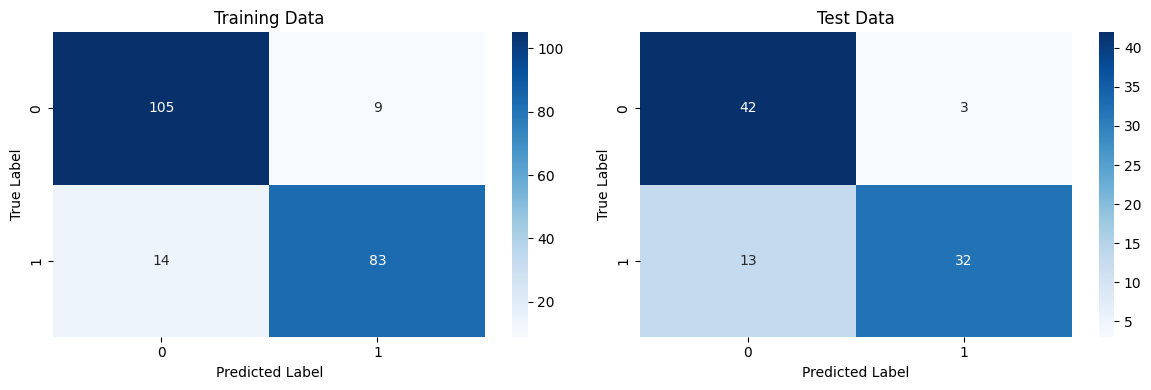

In [147]:
plot_confusion_matrices([df2_y_train, df2_y_test], [rbf_train_predictions_df2, rbf_test_predictions_df2], ['Training Data', 'Test Data'])

In [148]:
print_classification_report(df2_y_train, rbf_train_predictions_df2, title='Training Data')
print_classification_report(df2_y_test, rbf_test_predictions_df2, title='Test Data')

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       114
           1       0.90      0.86      0.88        97

    accuracy                           0.89       211
   macro avg       0.89      0.89      0.89       211
weighted avg       0.89      0.89      0.89       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        45
           1       0.91      0.71      0.80        45

    accuracy                           0.82        90
   macro avg       0.84      0.82      0.82        90
weighted avg       0.84      0.82      0.82        90



<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">Train SVM on <b>original</b> data with RBF kernel and C=0.3:
    </p>
</div>

In [149]:
rbf_svm_model_transformed = train_svm_model(transformed_X_train, transformed_y_train, kernel='rbf', C=0.3)

In [150]:
rbf_train_predictions_transformed = rbf_svm_model_transformed.predict(transformed_X_train)
rbf_test_predictions_transformed = rbf_svm_model_transformed.predict(transformed_X_test)

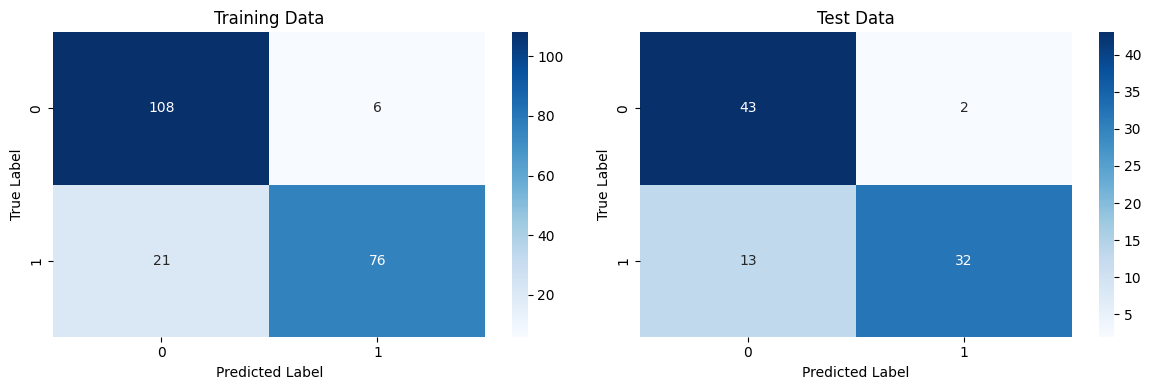

In [151]:
plot_confusion_matrices([transformed_y_train, transformed_y_test], [rbf_train_predictions_transformed, rbf_test_predictions_transformed], ['Training Data', 'Test Data'])

In [152]:
print_classification_report(transformed_y_train, rbf_train_predictions_transformed, title='Training Data')
print_classification_report(transformed_y_test, rbf_test_predictions_transformed, title='Test Data')

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       114
           1       0.93      0.78      0.85        97

    accuracy                           0.87       211
   macro avg       0.88      0.87      0.87       211
weighted avg       0.88      0.87      0.87       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85        45
           1       0.94      0.71      0.81        45

    accuracy                           0.83        90
   macro avg       0.85      0.83      0.83        90
weighted avg       0.85      0.83      0.83        90



<a id="categorical_bivariate"></a>
# <p style="background-color: #4169e1; padding: 1px; border-radius: 15px;color:white; font-size:22px; font-family:Calibri; text-align:center;line-height: 1.5em; border-radius:100px 20px;">📊 Sigmoid Kernel 📊</p>

⬆️ [Tabel of Contents](#contents_table) 

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">Train SVM on <b>original</b> data with sigmoid kernel and C=0.2:
    </p>
</div>

In [153]:
sigmoid_svm_model = train_svm_model(df2_X_train, df2_y_train, kernel='sigmoid', C=0.2)

In [154]:
sigmoid_train_predictions_df2 = sigmoid_svm_model.predict(df2_X_train)
sigmoid_test_predictions_df2 = sigmoid_svm_model.predict(df2_X_test)

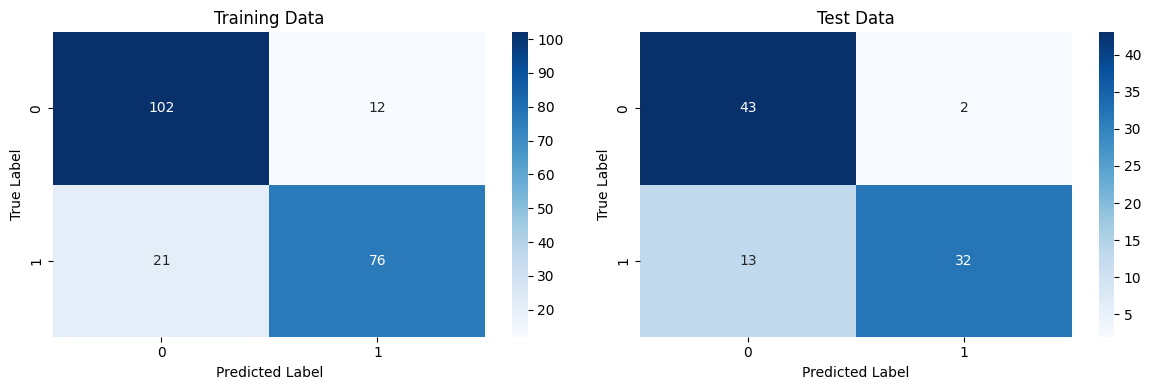

In [155]:
plot_confusion_matrices([df2_y_train, df2_y_test], [sigmoid_train_predictions_df2, sigmoid_test_predictions_df2], ['Training Data', 'Test Data'])

In [156]:
print_classification_report(df2_y_train, sigmoid_train_predictions_df2, title='Training Data')
print_classification_report(df2_y_test, sigmoid_test_predictions_df2, title='Test Data')

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       114
           1       0.86      0.78      0.82        97

    accuracy                           0.84       211
   macro avg       0.85      0.84      0.84       211
weighted avg       0.85      0.84      0.84       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85        45
           1       0.94      0.71      0.81        45

    accuracy                           0.83        90
   macro avg       0.85      0.83      0.83        90
weighted avg       0.85      0.83      0.83        90



<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">Train SVM on <b>transformed</b> data with sigmoid kernel and C=0.2:
    </p>
</div>

In [157]:
sigmoid_svm_model_transformed = train_svm_model(transformed_X_train, transformed_y_train, kernel='sigmoid', C=0.2)

In [158]:
sigmoid_train_predictions_transformed = sigmoid_svm_model_transformed.predict(transformed_X_train)
sigmoid_test_predictions_transformed = sigmoid_svm_model_transformed.predict(transformed_X_test)

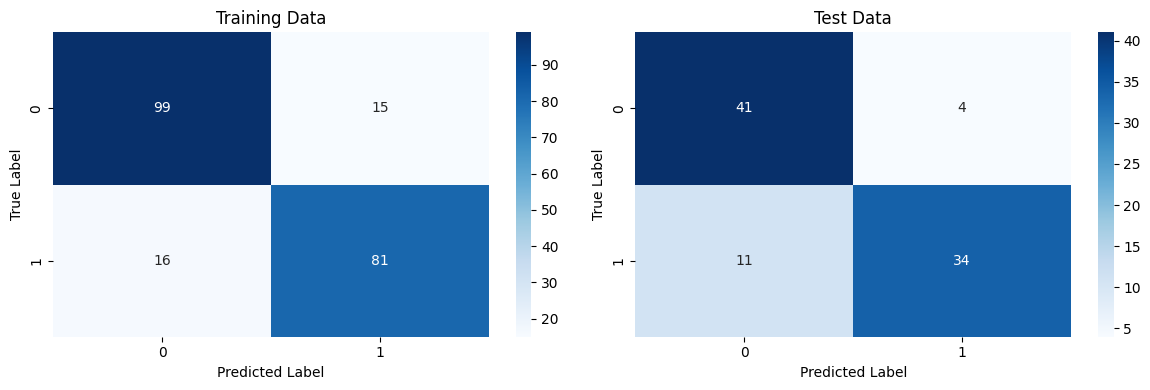

In [159]:
plot_confusion_matrices([transformed_y_train, transformed_y_test], [sigmoid_train_predictions_transformed, sigmoid_test_predictions_transformed], ['Training Data', 'Test Data'])

In [160]:
print_classification_report(transformed_y_train, sigmoid_train_predictions_transformed, title='Training Data')
print_classification_report(transformed_y_test, sigmoid_test_predictions_transformed, title='Test Data')

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       114
           1       0.84      0.84      0.84        97

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.85      0.85      0.85       211

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        45
           1       0.89      0.76      0.82        45

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90



<a id="categorical_bivariate"></a>
# <p style="background-color: #4169e1; padding: 1px; border-radius: 15px;color:white; font-size:22px; font-family:Calibri; text-align:center;line-height: 1.5em; border-radius:100px 20px;">Conclusion</p>


<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">

<h2 style="color:#5D76A9;">Classification Reports</h2>

<h3 style="color:#5D76A9;">Training Data (Kernel=Linear, C=0.3)</h3>
<ul>
  <li><b style="color:blue;">Original Data</b>
    <ul>
      <li><b style="color:#6495ed;">Precision:</b> 0.87 (class 0), 0.88 (class 1)</li>
      <li><b style="color:#6495ed;">Recall:</b> 0.90 (class 0), 0.85 (class 1)</li>
      <li><b style="color:#6495ed;">F1-score:</b> 0.89 (class 0), 0.86 (class 1)</li>
      <li><b style="color:#6495ed;">Accuracy:</b> 0.88</li>
    </ul>
  </li>
  <li><b style="color:blue;">Transformed Data</b>
    <ul>
      <li><b style="color:#6495ed;">Precision:</b> 0.87 (class 0), 0.88 (class 1)</li>
      <li><b style="color:#6495ed;">Recall:</b> 0.90 (class 0), 0.85 (class 1)</li>
      <li><b style="color:#6495ed;">F1-score:</b> 0.89 (class 0), 0.86 (class 1)</li>
      <li><b style="color:#6495ed;">Accuracy:</b> 0.88</li>
    </ul>
  </li>
</ul>

<h3 style="color:#5D76A9;">Test Data (Kernel=Linear, C=0.3)</h3>
<ul>
  <li><b style="color:blue;">Original Data</b>
    <ul>
      <li><b style="color:#6495ed;">Precision:</b> 0.76 (class 0), 0.82 (class 1)</li>
      <li><b style="color:#6495ed;">Recall:</b> 0.84 (class 0), 0.73 (class 1)</li>
      <li><b style="color:#6495ed;">F1-score:</b> 0.80 (class 0), 0.78 (class 1)</li>
      <li><b style="color:#6495ed;">Accuracy:</b> 0.79</li>
    </ul>
  </li>
  <li><b style="color:blue;">Transformed Data</b>
    <ul>
      <li><b style="color:#6495ed;">Precision:</b> 0.79 (class 0), 0.89 (class 1)</li>
      <li><b style="color:#6495ed;">Recall:</b> 0.91 (class 0), 0.76 (class 1)</li>
      <li><b style="color:#6495ed;">F1-score:</b> 0.85 (class 0), 0.82 (class 1)</li>
      <li><b style="color:#6495ed;">Accuracy:</b> 0.83</li>
    </ul>
  </li>
</ul>

<p style="color:darkblue;">Comparing the models, the model generally performs better on transformed test data, achieving higher precision, recall, and F1-score for both classes.</p>

</div>

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">    
    <ul style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri;">
        <li>I noticed that the SVM model got better after I used the box-cox transformation, although it wasn't consistent every time. So, I decided to stick with the one that improved.</li>
        <li>After looking at all the results, I went with a simple setting: a linear pattern and a regular amount of adjustment. This worked well after the transformation because the SVM model is sensitive, and the transformation helped smooth things out.</li>
    </ul>
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">
        So, in the end, the transformation really helped make the SVM model work better, especially since it can be tricky with outliers. Keeping things simple, like using a linear pattern and moderate adjustments, gave the best results after the transformation.
    </p>
</div>


<a id="dts"></a>
<div style="background-color:#5D76A9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff; text-align: center;">
    <b><span style='color:#45b1e8; font-size:18px;'>📊 9.3  | </span><span style='color:#F0F8FF;font-size:18px;'><b>Decision-Trees (DTs)</b> 📊</span></b>
</div>

⬆️ [Table of Contents](#contents_table) 

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">Random forests and decision trees both operate differently from certain other algorithms like k-nearest neighbors or support vector machines in terms of feature scaling. While methods like k-nearest neighbors or support vector machines heavily rely on the scale of features, random forests and decision trees primarily focus on feature differences rather than their exact values. Each tree in a decision tree model, including those within a random forest, only looks at a subset of features when making decisions. As a result, the scale of features doesn't significantly affect the decision-making process in these models. Therefore, there's no need to scale the data when using decision trees or random forests.</p>
</div>

<a id="dts-hpt"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 9.3.1 |</span><span style='color:#6495ed;font-size:20px;'> Build DTs & Hyper-parameter tuning🫀</span></b>

⬆️ [Table of Contents](#contents_table)

In [161]:
def plot_decision_tree_accuracy(X_train, y_train, X_test, y_test):
    """
    This is a function to plot the results of hyper-paramater tuning for different max depths 
    for both Entropy and Gini visually
    """
    range_depth = range(1, 10)

    dt_train_scores_entropy = []
    dt_test_scores_entropy = []

    dt_train_scores_gini = []
    dt_test_scores_gini = [] 

    for depth in range_depth:

        dt_clf_entropy = DecisionTreeClassifier(max_depth=depth, criterion="entropy")

        dt_clf_entropy.fit(X_train, y_train)

        dt_train_scores_entropy.append(dt_clf_entropy.score(X_train, y_train))
        dt_test_scores_entropy.append(dt_clf_entropy.score(X_test, y_test))

        dt_clf_gini = DecisionTreeClassifier(max_depth=depth, criterion="gini")

        dt_clf_gini.fit(X_train, y_train)

        dt_train_scores_gini.append(dt_clf_gini.score(X_train, y_train))
        dt_test_scores_gini.append(dt_clf_gini.score(X_test, y_test))

    plt.figure(figsize=(12, 4))

    plt.plot(range_depth, dt_train_scores_entropy, label="Entropy Training Accuracy", color="red", linestyle='-')
    plt.plot(range_depth, dt_test_scores_entropy, label="Entropy Test Accuracy", color="blue", linestyle='-')

    plt.plot(range_depth, dt_train_scores_gini, label="Gini Training Accuracy", color="orange", linestyle='--')
    plt.plot(range_depth, dt_test_scores_gini, label="Gini Test Accuracy", color="green", linestyle='--')

    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title(f'Decision Tree Accuracy')
    plt.legend()
    plt.xticks(range(1, 10))
    plt.grid()
    plt.show()

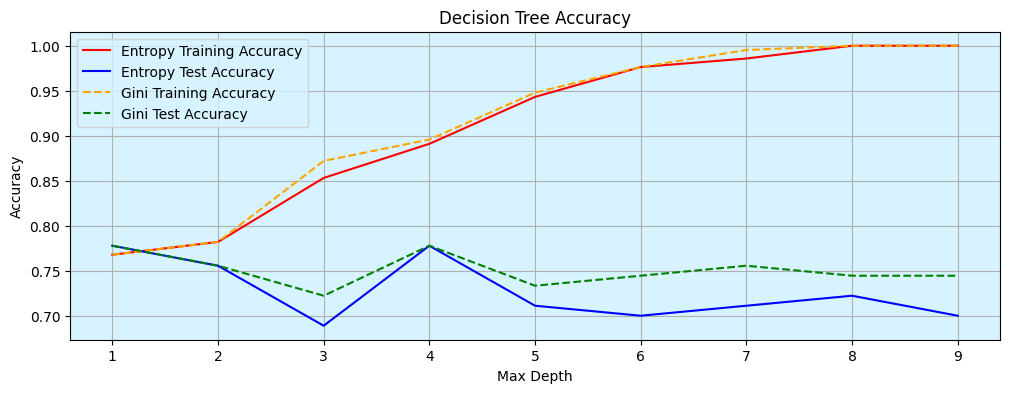

In [162]:
plot_decision_tree_accuracy(df3_tr_X_train, df3_tr_y_train, df3_tr_X_test, df3_tr_y_test)

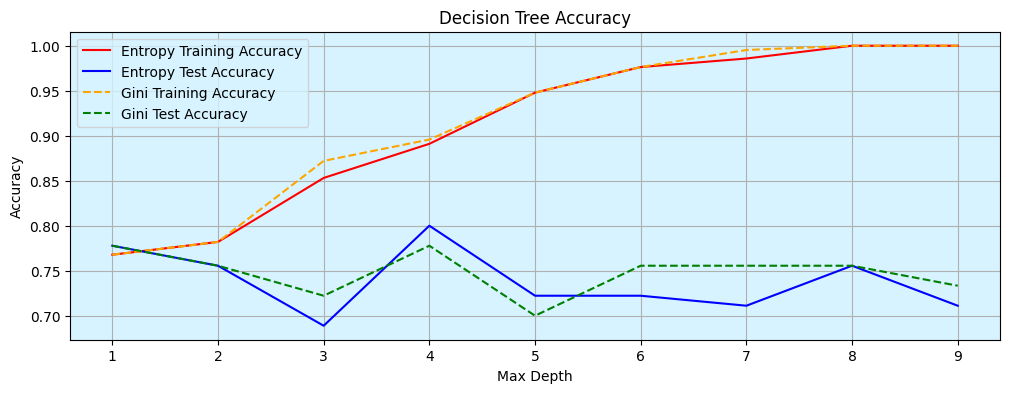

In [163]:
plot_decision_tree_accuracy(df3_X_train, df3_y_train, df3_X_test, df3_y_test)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 16px; color: blue;">
    The model looks has better performance on depth=4, so let's take a look at the results of max depth=4.
    </p>
</div>


<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 16px;">
<b>Decision trees</b> are good at dealing with outliers, so even if the data is changed a bit, the model still works well. This means that small changes in the data don't really affect how well the model works. So, we can rely on decision trees to give us consistent results, even when there are outliers. Also , in this case we just have a bit differnces to train out DTs model on original data and transformed data on max depth = 4, but it's not significant.
</div>

<a id="dts-evaluation"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 9.3.2 |</span><span style='color:#6495ed;font-size:20px;'> DTs Model Evaluation🫀</span></b>

⬆️ [Table of Contents](#contents_table)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 16px;">
   Now let's build our DTs model on max depth=4 on both Entropy and Gini to see the results:
    </p>
</div>


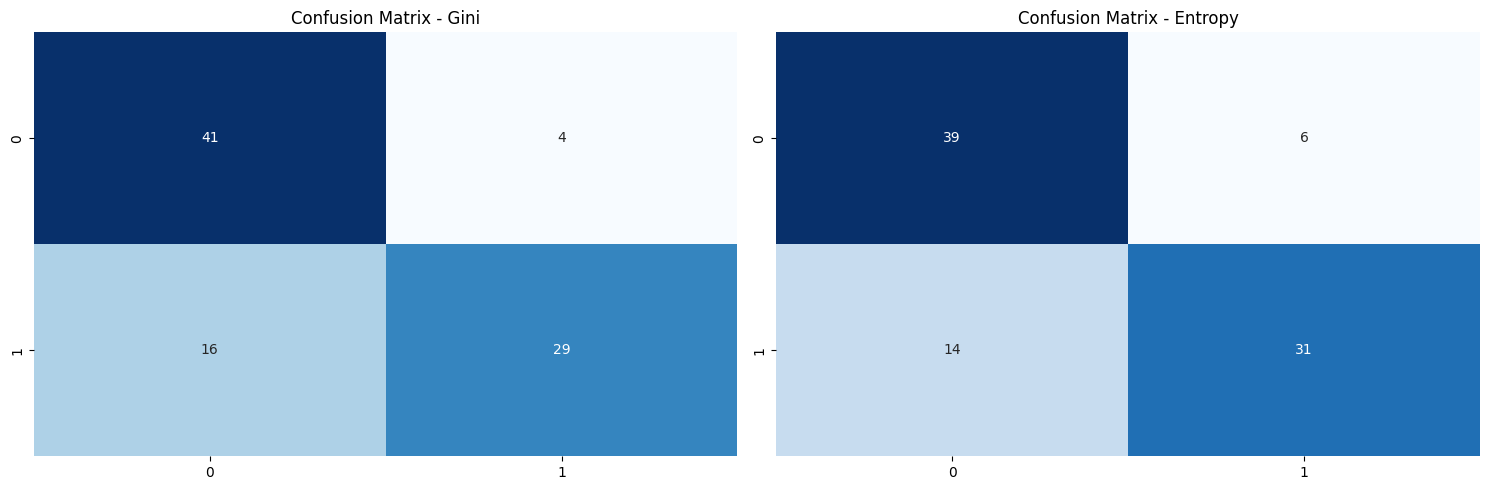

In [164]:
dt_clf_entropy = DecisionTreeClassifier(max_depth=4, criterion="entropy")
dt_clf_entropy.fit(df3_X_train, df3_y_train)

dt_clf_gini = DecisionTreeClassifier(max_depth=4, criterion="gini")
dt_clf_gini.fit(df3_X_train, df3_y_train)

y_pred_gini_dt_test = dt_clf_gini.predict(df3_X_test)
y_pred_entropy_dt_test = dt_clf_entropy.predict(df3_X_test)

cm_gini_dt = confusion_matrix(df3_y_test, y_pred_gini_dt_test)
cm_entropy_dt = confusion_matrix(df3_y_test, y_pred_entropy_dt_test)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_gini_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Gini')

plt.subplot(1, 2, 2)
sns.heatmap(cm_entropy_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Entropy')

plt.tight_layout()
plt.show()

In [165]:
dt_clf_entropy = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)
dt_clf_entropy.fit(df3_X_train, df3_y_train)

dt_clf_gini = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=42)
dt_clf_gini.fit(df3_X_train, df3_y_train)

y_pred_entropy_dt_train = dt_clf_entropy.predict(df3_X_train)
y_pred_entropy_dt_test = dt_clf_entropy.predict(df3_X_test)
y_pred_gini_dt_train = dt_clf_gini.predict(df3_X_train)
y_pred_gini_dt_test = dt_clf_gini.predict(df3_X_test)

In [166]:
print("Entropy Criterion:")
print("Training:")
print(classification_report(df3_y_train, y_pred_entropy_dt_train))
print("Testing:")
print(classification_report(df3_y_test, y_pred_entropy_dt_test))

print(53*"*")

print("Gini Criterion:")
print("Training:")
print(classification_report(df3_y_train, y_pred_gini_dt_train))
print("Testing:")
print(classification_report(df3_y_test, y_pred_gini_dt_test))

Entropy Criterion:
Training:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       114
           1       0.94      0.81      0.87        97

    accuracy                           0.89       211
   macro avg       0.90      0.89      0.89       211
weighted avg       0.90      0.89      0.89       211

Testing:
              precision    recall  f1-score   support

           0       0.75      0.89      0.82        45
           1       0.86      0.71      0.78        45

    accuracy                           0.80        90
   macro avg       0.81      0.80      0.80        90
weighted avg       0.81      0.80      0.80        90

*****************************************************
Gini Criterion:
Training:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       114
           1       0.97      0.79      0.88        97

    accuracy                           0.90       211
   macro a

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    
<h3 style="color:#5D76A9;">Entropy Criterion (max_depth = 4):</h3>
<ul>
  <li><b style="color:blue;">Training:</b>
    <ul>
      <li><b style="color:#6495ed;">Precision:</b> 0.86 (class 0), 0.94 (class 1)</li>
      <li><b style="color:#6495ed;">Recall:</b> 0.96 (class 0), 0.81 (class 1)</li>
      <li><b style="color:#6495ed;">F1-score:</b> 0.90 (class 0), 0.87 (class 1)</li>
      <li><b style="color:#6495ed;">Accuracy:</b> 0.89</li>
    </ul>
  </li>
  <li><b style="color:blue;">Testing:</b>
    <ul>
      <li><b style="color:#6495ed;">Precision:</b> 0.75 (class 0), 0.86 (class 1)</li>
      <li><b style="color:#6495ed;">Recall:</b> 0.89 (class 0), 0.71 (class 1)</li>
      <li><b style="color:#6495ed;">F1-score:</b> 0.82 (class 0), 0.78 (class 1)</li>
      <li><b style="color:#6495ed;">Accuracy:</b> 0.80</li>
    </ul>
  </li>
</ul>
    
<h3 style="color:#5D76A9;">Gini Criterion (max_depth = 4):</h3>
<ul>
  <li><b style="color:blue;">Training:</b>
    <ul>
      <li><b style="color:#6495ed;">Precision:</b> 0.85 (class 0), 0.97 (class 1)</li>
      <li><b style="color:#6495ed;">Recall:</b> 0.98 (class 0), 0.79 (class 1)</li>
      <li><b style="color:#6495ed;">F1-score:</b> 0.91 (class 0), 0.88 (class 1)</li>
      <li><b style="color:#6495ed;">Accuracy:</b> 0.90</li>
    </ul>
  </li>
  <li><b style="color:blue;">Testing:</b>
    <ul>
      <li><b style="color:#6495ed;">Precision:</b> 0.72 (class 0), 0.88 (class 1)</li>
      <li><b style="color:#6495ed;">Recall:</b> 0.91 (class 0), 0.64 (class 1)</li>
      <li><b style="color:#6495ed;">F1-score:</b> 0.80 (class 0), 0.74 (class 1)</li>
      <li><b style="color:#6495ed;">Accuracy:</b> 0.78</li>
    </ul>
  </li>
</ul>

<p style="color:darkblue;">Based on the evaluation, the models trained with the Entropy criterion generally outperform those trained with the Gini criterion, especially in the testing set where they achieve higher precision, recall, and F1-score for both classes. Therefore, the Entropy criterion appears to be more effective for this dataset.</p>

</div>

<a id="rf"></a>
<div style="background-color:#5D76A9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff; text-align: center;">
    <b><span style='color:#45b1e8; font-size:18px;'>📊 9.4  | </span><span style='color:#F0F8FF;font-size:18px;'><b>Random Forest (RF)</b> 📊</span></b>
</div>

⬆️ [Table of Contents](#contents_table) 

<a id="rf-hpt"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 9.4.1 |</span><span style='color:#6495ed;font-size:20px;'> Build RF & Hyper-parameter tuning🫀</span></b>

⬆️ [Table of Contents](#contents_table)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <h2 style="font-size:18px; font-family:Calibri, sans-serif; color:#4169e1;">Tuning Hyper-parameters:</h2>
    <ul style="font-size:16px; font-family:Calibri, sans-serif;">
        <li><b>n_estimators:</b> The number of trees in the forest.</li>
        <li><b>max_depth:</b> The maximum depth of each tree in the forest.</li>
        <li><b>criterion:</b> The function to measure the quality of a split.</li>
    </ul>
</div>


In [167]:
def plot_random_forest_accuracy(X_train, y_train, X_test, y_test):
    """
    This function make plots that shows the number of estimators as x-axis and the lines show the performance
    of model with different criterions (Entropy and Gini) on both original and transformed data to pick
    the one that has better performance
    """
    
    n_estimators_range = range(1, 30)

    rf_train_scores_entropy = []
    rf_test_scores_entropy = []

    rf_train_scores_gini = []
    rf_test_scores_gini = [] 

    for n_estimators in n_estimators_range:

        rf_clf_entropy = RandomForestClassifier(n_estimators=n_estimators, max_depth=3, criterion="entropy", random_state=42)
        rf_clf_entropy.fit(X_train, y_train)

        rf_train_scores_entropy.append(rf_clf_entropy.score(X_train, y_train))
        rf_test_scores_entropy.append(rf_clf_entropy.score(X_test, y_test))

        rf_clf_gini = RandomForestClassifier(n_estimators=n_estimators, max_depth=3, criterion="gini", random_state=42)

        rf_clf_gini.fit(X_train, y_train)

        rf_train_scores_gini.append(rf_clf_gini.score(X_train, y_train))
        rf_test_scores_gini.append(rf_clf_gini.score(X_test, y_test))

    plt.figure(figsize=(14, 4))

    plt.plot(n_estimators_range, rf_train_scores_entropy, label="Entropy Training Accuracy", color="red", linestyle='-')
    plt.plot(n_estimators_range, rf_test_scores_entropy, label="Entropy Test Accuracy", color="red", linestyle='--')

    plt.plot(n_estimators_range, rf_train_scores_gini, label="Gini Training Accuracy", color="blue", linestyle='-')
    plt.plot(n_estimators_range, rf_test_scores_gini, label="Gini Test Accuracy", color="blue", linestyle='--')

    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title('Random Forest Classifier Accuracy with Max Depth=2')
    plt.legend()
    plt.xticks(n_estimators_range)
    plt.grid()
    plt.show()

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">Tuning random forest on original data (no scaling and no transformation):
</div>

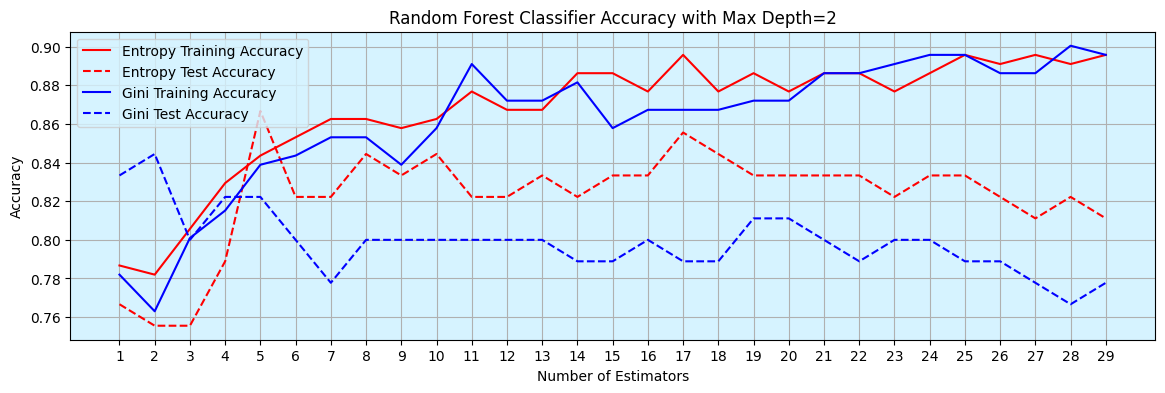

In [168]:
plot_random_forest_accuracy(df3_tr_X_train, df3_tr_y_train, df3_tr_X_test, df3_tr_y_test)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 20px;">Tuning random forest on transformed data (no scaling):
</div>

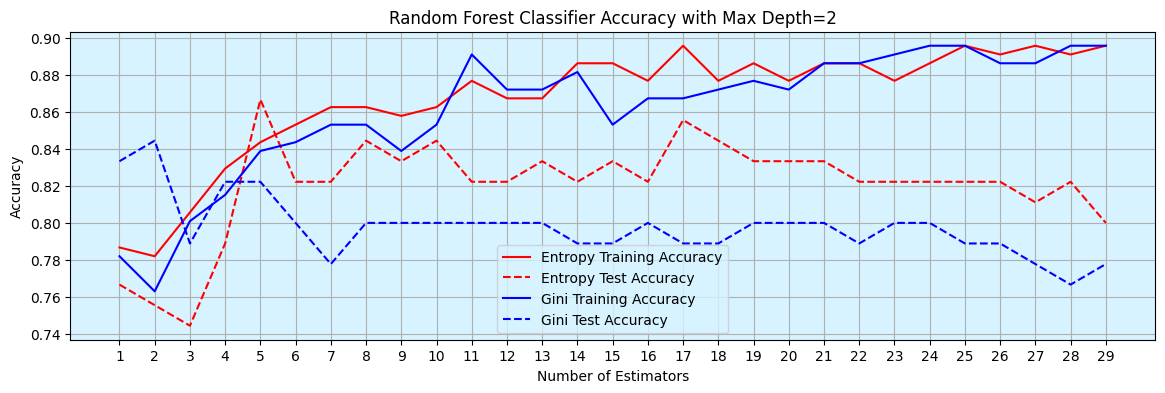

In [169]:
plot_random_forest_accuracy(df3_X_train, df3_y_train, df3_X_test, df3_y_test)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 16px;">
    In this situation, <b>random forests</b> are highlighted for their ability to handle outliers well. This means that any changes made to the data might not affect the results much. So, the performance of the model should be similar whether we use the original data or the modified data. This suggests that the changes made didn't have a big impact on the final results. Therefore, we expect the random forest model to perform consistently even when there are outliers in the data.
    </p>
</div>

<a id="rf-evaluation"></a>
# <b><span style='color:#45b1e8; font-size:20px;'>📊 Step 9.4.2 |</span><span style='color:#6495ed;font-size:20px;'> RF Model Evaluation🫀</span></b>

⬆️ [Table of Contents](#contents_table)

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <p style="font-size:16px; font-family:Calibri, sans-serif; line-height: 1.5em; text-align: justify; font-size:16px; font-family:calibri; text-indent: 16px;">
    The best parameter that I decided to choose to train our random forest model is <b>(n_estimators=17, max_depth=3, criterion="entropy")</b> on original data.
    </p>
</div>

In [170]:
rf_clf_entropy = RandomForestClassifier(n_estimators=17, max_depth=3, criterion="entropy", random_state=42)
rf_clf_entropy.fit(df3_tr_X_train, df3_tr_y_train)

y_pred_entropy_rf_train = rf_clf_entropy.predict(df3_tr_X_train)
y_pred_entropy_rf_test = rf_clf_entropy.predict(df3_tr_X_test)

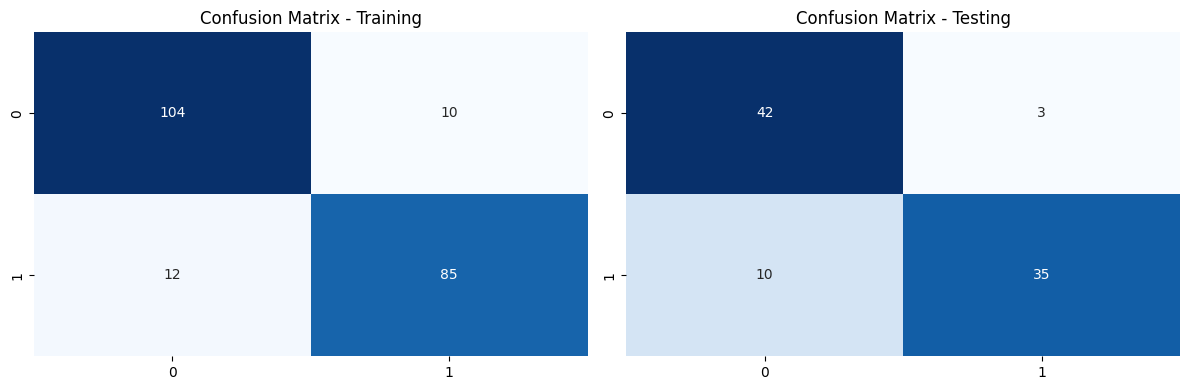

In [171]:
conf_matrix_train = confusion_matrix(df3_tr_y_train, y_pred_entropy_rf_train)
conf_matrix_test = confusion_matrix(df3_tr_y_test, y_pred_entropy_rf_test)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Training')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Testing')

plt.tight_layout()
plt.show()

In [172]:
print("Entropy Criterion:")
print("Training:")
print(classification_report(df3_tr_y_train, y_pred_entropy_rf_train))
print("Testing:")
print(classification_report(df3_tr_y_test, y_pred_entropy_rf_test))

Entropy Criterion:
Training:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       114
           1       0.89      0.88      0.89        97

    accuracy                           0.90       211
   macro avg       0.90      0.89      0.89       211
weighted avg       0.90      0.90      0.90       211

Testing:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        45
           1       0.92      0.78      0.84        45

    accuracy                           0.86        90
   macro avg       0.86      0.86      0.85        90
weighted avg       0.86      0.86      0.85        90



<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">

<h2 style="color:#5D76A9;">Entropy Criterion:</h2>
<ul>
  <li><b style="color:blue;">Training:</b>
    <ul>
      <li><b style="color:#6495ed;">Precision:</b> 0.90 (class 0), 0.89 (class 1)</li>
      <li><b style="color:#6495ed;">Recall:</b> 0.91 (class 0), 0.88 (class 1)</li>
      <li><b style="color:#6495ed;">F1-score:</b> 0.90 (class 0), 0.89 (class 1)</li>
      <li><b style="color:#6495ed;">Accuracy:</b> 0.90</li>
    </ul>
  </li>
  <li><b style="color:blue;">Testing:</b>
    <ul>
      <li><b style="color:#6495ed;">Precision:</b> 0.81 (class 0), 0.92 (class 1)</li>
      <li><b style="color:#6495ed;">Recall:</b> 0.93 (class 0), 0.78 (class 1)</li>
      <li><b style="color:#6495ed;">F1-score:</b> 0.87 (class 0), 0.84 (class 1)</li>
      <li><b style="color:#6495ed;">Accuracy:</b> 0.86</li>
    </ul>
  </li>
</ul>

<p style="color:darkblue;">Based on this comparison, the Entropy criterion demonstrates consistent performance in both training and testing phases. Precision, recall, and F1-score are well-balanced, indicating the model's robustness.</p>

</div>


<a id="conclusion"></a>
<div class="hover-effect" id="setup">
        <p class="text"><b>👨🏻‍⚕️ Step 10 | Conclusion</b></p>
        <div class="overlay"></div>
</div>

⬆️ [Table of Contents](#contents_table)

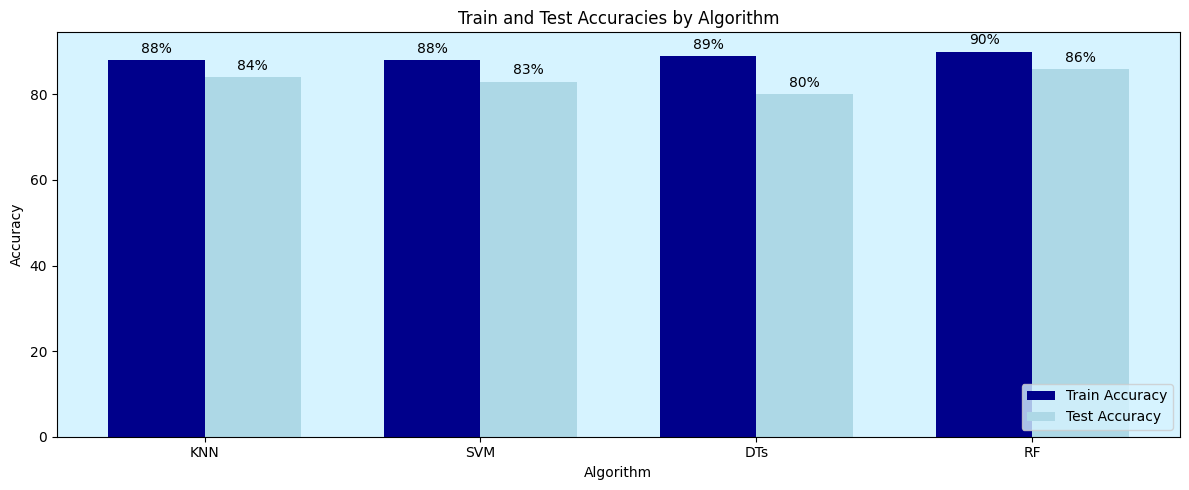

In [173]:
model_accuracies = {
    'Model.1': {'KNN': {'Train Accuracy': 88, 'Test Accuracy': 84}},
    'Model.2': {'SVM': {'Train Accuracy': 88, 'Test Accuracy': 83}},
    'Model.3': {'DTs': {'Train Accuracy': 89, 'Test Accuracy': 80}},
    'Model.4': {'RF': {'Train Accuracy': 90, 'Test Accuracy': 86}}
}

algorithms = []
train_accuracies = []
test_accuracies = []

for model, algorithm_data in model_accuracies.items():
    algorithm_name = list(algorithm_data.keys())[0]
    algorithms.append(algorithm_name)
    train_accuracy = algorithm_data[algorithm_name]['Train Accuracy']
    test_accuracy = algorithm_data[algorithm_name]['Test Accuracy']
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

x = range(len(algorithms))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 5)) 

train_bars = ax.bar(x, train_accuracies, bar_width, label='Train Accuracy', color='darkblue')
test_bars = ax.bar([i + bar_width for i in x], test_accuracies, bar_width, label='Test Accuracy', color='lightblue')

ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Test Accuracies by Algorithm')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(algorithms)
ax.legend(loc='lower right')

for bars in [train_bars, test_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


<div style="background-color:#f0f8ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff;">
    <h2 style="text-align: left; color: #333; font-weight: bold; font-size:18px; color:#5D76A9;">Facing Challenges:</h2>
    <ul>
        <li><b style="color: #0f52ba; ">Not Enough Data:</b> The dataset was small, so it was hard to get good results with only 70% of it.</li>
        <li><b style="color: #0f52ba;">Imbalanced number of samples for classes on test data:</b> Getting good results for both types of data (class 0 and class 1) was tough.</li>
    </ul>
    <h2 style="text-align: left; color: #333; font-weight: bold; font-size:18px; color:#5D76A9;">Strategies:</h2>
    <ul>
        <li><b style="color: #0f52ba;">Hyper-parameter tuning:</b> I tried different methods, like changing settings called hyperparameters, to improve accuracy.</li>
        <li><b style="color: #0f52ba;">Handling imbalanced data for classes:</b> Results were checked separately for each class using the same amount of data.</li>
    </ul>
    <h2 style="text-align: left; color: #333; font-weight: bold; font-size:18px; color:#5D76A9;">Dealing with Outliers:</h2>
    <ul>
        <li><b style="color: #0f52ba;">Transformation method:</b> I used a method called boxcox-transformation to handle outliers.</li>
        <li><b style="color: #0f52ba;">Model sensitivity:</b> This helped improve accuracy for models like SVM and KNN, which are sensitive outliers.</li>
    </ul>
    <h2 style="text-align: left; color: #333; font-weight: bold; font-size:18px; color:#5D76A9;">Model Performance:</h2>
    <ul>
        <li><b style="color: #0f52ba;">Best Result:</b> The random forest model did the best, with 90% accuracy on training data and 86% on test data.</li>
        <li><b style="color: #0f52ba;">Final Decision:</b> Since it did well on the test data, I chose the random forest as the final algorithm.</li>
    </ul>

<a id="communication"></a>
<div class="hover-effect" id="setup">
        <p class="text"><b>Communication</b></p>
        <div class="overlay"></div>
</div>

⬆️ [Table of Contents](#contents_table)

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <p style="font-size: 20px; font-family: Calibri; line-height: 1.5em; color: #222C47;">
        If you enjoy this content, consider following me on LinkedIn for more insights into data science and machine learning.<br>
        <a href="https://www.linkedin.com/in/danial-soleimany-30abb4220/" target="_blank">LinkedIn</a><br>
        You can also explore additional resources on my GitHub profile:<br>
        <a href="https://github.com/DanialSoleimany" target="_blank">GitHub</a>
    </p>
</div>


<div style="background-color:#f1f1ff; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 #f0f8ff; text-align: center;">
    <b><span style='color:#0f52ba; font-size:18px;'>💐 Best Regards 💐</span></b>
</div>
